# API

In [6]:
import matplotlib.pyplot as plt
import time
import pickle
import scipy.stats
from scipy import interpolate
from copy import copy
import pandas as pd
from matplotlib.animation import FuncAnimation
from scipy.stats import rv_continuous
from tqdm import tqdm
from itertools import permutations


In [7]:
import numpy as np
import scipy.linalg as la
import numpy.linalg as nla
import numpy.matlib
import itertools

In [5]:
%load_ext line_profiler

In [13]:
from importlib import reload

import GTN
reload(GTN)
from GTN import *

# Test

In [39]:
gtn=GTN(L=1,seed=1,op=True,random_init=False)
# sites_flip=np.sort(gtn.rng.choice(np.arange(gtn.L),size=gtn.L//2,replace=False))
# gtn.measure([[1,0,0]]*(gtn.L//2),np.array([[2*site+1,2*site+2] for site in sites_flip]).flatten())

# sites_flip=np.sort(gtn.rng.choice(np.arange(2*gtn.L),size=gtn.L,replace=False))
# gtn.set(ij_list=np.array([[site,site+gtn.L*2] for site in sites_flip]),n_list=[-1]*gtn.L)

# gtn.measure_all_class_AIII_r(A_list=0.5,r_list=[1],Born=True,class_A=True,intraleg=True,)

# gtn.measure([[0,0,1],],[1,2,])
# gtn.measure([[0.1,np.sqrt(1-0.1**2)*np.sin(np.pi/4),np.sqrt(1-0.1**2)*np.cos(np.pi/4)],],np.array([1,2]))
# gtn.measure_all_sync(0, 0, 1, 1,even=False)
# gtn.measure_all_sync(0, 0, 1, 1,even=True)
# gtn.measure_class_A(0,np.arange(4))
# gtn.measure_class_A(alpha=-0.5,beta=0.0,theta1=0,theta2=0,ix=np.arange(4))
# gtn.measure_class_A(alpha=-0,beta=0,theta1=1,theta2=1,ix=np.arange(4))

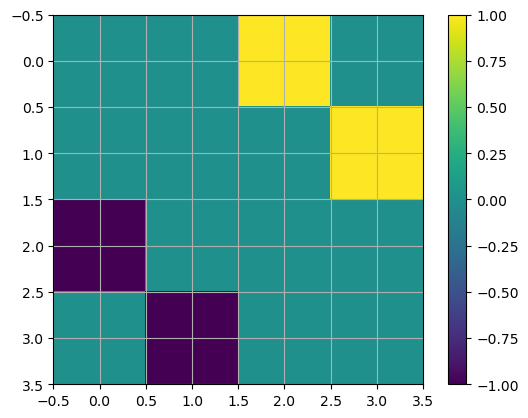

In [40]:
plt.imshow(gtn.C_m_history[-1])
plt.colorbar()
plt.grid('on')

In [45]:
gtn.von_Neumann_entropy_m([0])

<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in multiply


0.6931471805599453

In [437]:
# A=np.cos(0.1*np.pi)
# A=np.cos(np.pi/2-0.1*np.pi)
# A=A_list[0]
A=0.01
r=0.99
for i in tqdm(range(gtn.L)):
# for i in tqdm(range(1)):
    # gtn.measure_all_class_AIII(A_list=A,Born=True,class_A=True,even=True,)
    # gtn.measure_all_class_AIII(A_list=np.sqrt(1-A**2),Born=True,class_A=True,even=False,)
    gtn.measure_all_class_AIII_r(A_list=A,r_list=r,Born=True,class_A=True,intraleg=True,)
    gtn.measure_all_class_AIII_r(A_list=np.sqrt(1-A**2),r_list=r,Born=True,class_A=True,intraleg=False,)


100%|██████████| 4/4 [00:00<00:00, 671.68it/s]


In [434]:
gtn.von_Neumann_entropy_m(np.arange(gtn.L//2))/np.log(2)

2.0

In [440]:
gtn.von_Neumann_entropy_m(gtn.L+np.arange(gtn.L))/np.log(2)

1.1222613308940924e-09

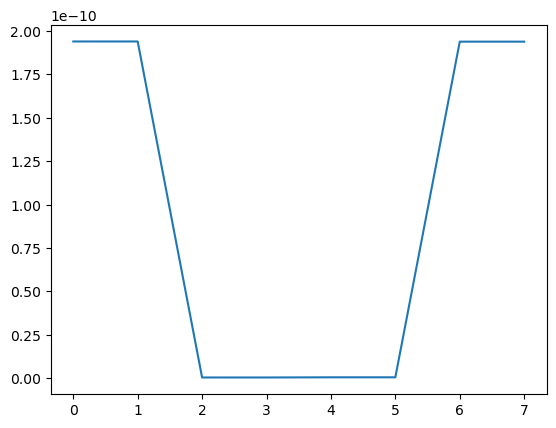

In [441]:
plt.plot(gtn.entanglement_contour(gtn.L+np.arange(gtn.L)))

In [60]:
gtn.von_Neumann_entropy_m_self_average(unitcell=2)

1.3862943611198997

In [ ]:
gtn.von_Neumann_entropy_m(np.arange(0,gtn.L//2))

In [40]:
gtn.mutual_information_cross_ratio(stepsize=2)

2.3516744107610066e-12

In [41]:
gtn.mutual_information_cross_ratio(stepsize=1)

1.6782931916682503e-12

In [346]:
gtn.mutual_information_cross_ratio()

0.2845429789122659

In [271]:
gtn.mutual_information_cross_ratio()

0.4776456685167928

In [276]:
gtn.mutual_information_cross_ratio()

0.3693141036970214

In [48]:
gtn.von_Neumann_entropy_m(np.arange(0,gtn.L//2))

1.386294361119903

In [47]:
gtn.mutual_information_m([1],[2])

1.3862943610816176

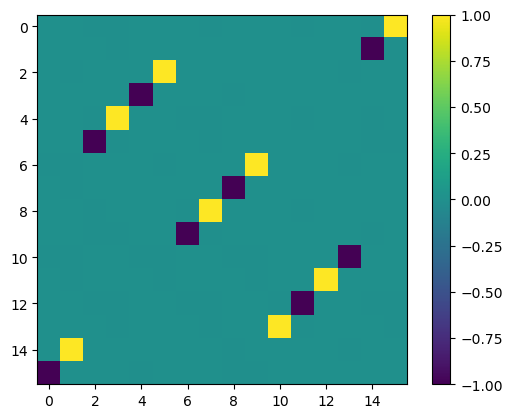

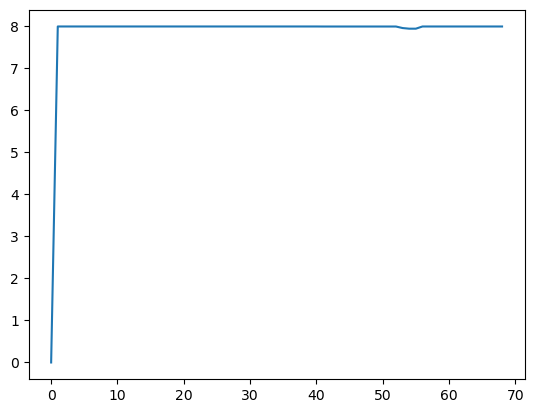

In [303]:
density=[((1-np.diag(gtn.C_m_history[i],k=1)[::2])/2).sum() for i in range(len(gtn.C_m_history))]
plt.plot(density)

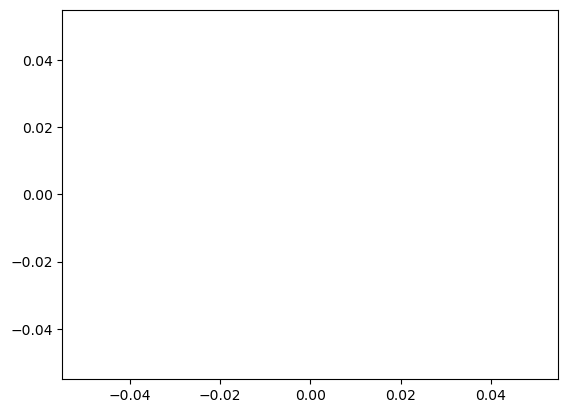

In [279]:
plt.plot(gtn.MI_history)

In [280]:
gtn.C_m_history[-1][:4,:4]

array([[ 0.        ,  0.00681128,  0.40239916, -0.06990497],
       [-0.00681128,  0.        ,  0.06990497,  0.40239916],
       [-0.40239916, -0.06990497,  0.        , -0.00797897],
       [ 0.06990497, -0.40239916,  0.00797897,  0.        ]])

In [ ]:
zz=[get_Born_class_AIII(A=0.5,Gamma=gtn.C_m_history[-1][:4,:4],rng=rng,class_A=True) for rng in range(100)]

In [258]:
from collections import Counter

In [ ]:
Counter(z)

In [259]:
Counter([z[0] for z in zz])

Counter({(1, -1): 57, (-1, 1): 43})

In [256]:
np.unique([z[0] for z in zz],return_counts=True)

(array([-1,  1]), array([100, 100]))

In [71]:
gtn.measure_class_AIII(A=.5,theta1=np.pi/2,theta2=0,kind=(-1,-1),ix=range(4),)

In [ ]:
for i in tqdm(range(gtn.L)):
    gtn.measure_all_class_A(0.8,0.8,np.pi,even=True,inverse=True,orth=True)
    gtn.measure_all_class_A(0.8,0.8,np.pi,even=False,inverse=False,orth=True)

100%|██████████| 8/8 [00:00<00:00, 63.55it/s]


In [289]:
gtn.mutual_information_m(np.arange(gtn.L//4), gtn.L//2+np.arange(gtn.L//4))

0.25771425238790746

In [281]:
gtn.mutual_information_cross_ratio()

0.26551369518019236

In [278]:
gtn.L

8

In [75]:
def run_single_class_AIII(L,seed,A):
    gtn=GTN(L=L,seed=seed,op=False,random_init=False,history=False)
    sites_flip=np.sort(gtn.rng.choice(np.arange(gtn.L),size=gtn.L//2,replace=False))
    gtn.measure([[1,0,0]]*(gtn.L//2),np.sort(np.r_[2*sites_flip,2*sites_flip+1]))
    # for i in (range(1)):
    for i in (range(gtn.L)):
        gtn.measure_all_class_AIII(A_list=A,Born=True,class_A=True,even=True,)
        gtn.measure_all_class_AIII(A_list=np.sqrt(1-A**2),Born=True,class_A=True,even=False,)
    MI=gtn.mutual_information_cross_ratio()
    EE=gtn.von_Neumann_entropy_m_self_average(unitcell=2)
    # den=((1-np.diag(gtn.C_m_history[-1],k=1)[::2])/2).sum()
    return MI,EE
    

In [347]:
def run_single_class_AIII_r(L,seed,A,r):
    gtn=GTN(L=L,seed=seed,op=False,random_init=False,history=False)
    sites_flip=np.sort(gtn.rng.choice(np.arange(gtn.L),size=gtn.L//2,replace=False))
    gtn.measure([[1,0,0]]*(gtn.L//2),np.sort(np.r_[2*sites_flip,2*sites_flip+1]))
    # for i in (range(1)):
    for i in (range(gtn.L)):
        gtn.measure_all_class_AIII_r(A_list=A,r=r,Born=True,class_A=True,intraleg=True,)
        gtn.measure_all_class_AIII_r(A_list=np.sqrt(1-A**2),r=r,Born=True,class_A=True,intraleg=False,)
    MI=gtn.mutual_information_cross_ratio()
    EE=gtn.von_Neumann_entropy_m_self_average(unitcell=2)
    # den=((1-np.diag(gtn.C_m_history[-1],k=1)[::2])/2).sum()
    return MI,EE,
    

In [340]:
mi,ee,gtn=run_single_class_AIII_r(16,99,0.01,2.99)

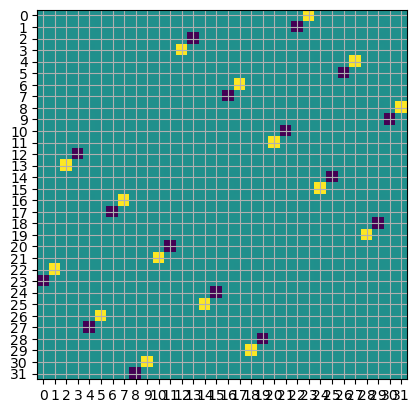

In [341]:
plt.imshow(gtn.C_m_history[-1],interpolation='none')
plt.xticks(range(2*gtn.L))
plt.yticks(range(2*gtn.L))
plt.grid()

In [342]:
mi/np.log(2)

2.0000000000597655

In [343]:
ee/np.log(2)

6.0000000000000036

In [274]:
np.sum((1-(np.diag(gtn.C_m_history[-1],-1)[::2]))/2)

4.0

In [310]:
np.cos([np.pi/2*0.95])

array([0.0784591])

In [308]:
np.mean([run_single_class_AIII_r(8,idx,0.01,2.01)[1]/np.log(2) for idx in range(100)])

3.980004727753142

In [140]:
run_single_class_AIII_r(32,6,0.01,0.9)/np.log(2)

array([2.95516095e-14, 2.00000000e+00])

In [7]:
%lprun -f P_contraction MI=run_single_class_AIII(128,1,0.5)

Timer unit: 1e-09 s

Total time: 47.6319 s
File: /mnt/d/Cornell/GTN/GTN.py
Function: P_contraction at line 610

Line #      Hits         Time  Per Hit   % Time  Line Contents
   610                                           def P_contraction(m,proj_list,ix,ix_bar,combine=True):
   611     16385  306011792.0  18676.3      0.6      ix,ix_bar=list(ix),list(ix_bar)
   612                                           
   613     16385   15056294.0    918.9      0.0      if combine:
   614         1      27579.0  27579.0      0.0          proj=np.zeros((4*len(proj_list),4*len(proj_list)))
   615                                                   # change index from (in_1, in_2, out_1, out_2) (in_3, in_4, out_3, out_4)
   616                                                   # to (in_1 , in_2, in_3, in_4, out_1, out_2, out_3, out_4)
   617        65      23144.0    356.1      0.0          for i,p in enumerate(proj_list):
   618        64    1174956.0  18358.7      0.0              proj[np.ix_([2*

In [224]:
MI

0.0007544673270007888

In [6]:
%lprun -f P_contraction_2 MI=run_single_class_AIII(128,1,0.5)

Timer unit: 1e-09 s

Total time: 37.6052 s
File: /mnt/d/Cornell/GTN/GTN.py
Function: P_contraction_2 at line 669

Line #      Hits         Time  Per Hit   % Time  Line Contents
   669                                           def P_contraction_2(Gamma,Upsilon,ix,ix_bar):
   670                                               """ same analytical expression for contraction as _contraction(), differences:
   671                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
   672                                               2. manually compute the inverse of mat2 before
   673                                               Here, Gamma is m, and proj is Upsilon
   674                                               Assume Upsilon = [A,B;C,D], the logic is to first compute C= (1+ Gamma_RR @ Upsilon_LL)^{-1}, (where then B=-C.T

In [6]:
%lprun -f P_contraction_2 MI=run_single_class_AIII(128,1,0.5)

Timer unit: 1e-09 s

Total time: 17.2741 s
File: /mnt/d/Cornell/GTN/GTN.py
Function: P_contraction_2 at line 669

Line #      Hits         Time  Per Hit   % Time  Line Contents
   669                                           def P_contraction_2(Gamma,Upsilon,ix,ix_bar):
   670                                               """ same analytical expression for contraction as _contraction(), differences:
   671                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
   672                                               2. manually compute the inverse of mat2 before
   673                                               Here, Gamma is m, and proj is Upsilon
   674                                               Assume Upsilon = [A,B;C,D], the logic is to first compute C= (1+ Gamma_RR @ Upsilon_LL)^{-1}, (where then B=-C.T

In [6]:
%lprun -f P_contraction_2 MI=run_single_class_AIII(128,1,0.5)

Timer unit: 1e-09 s

Total time: 11.8247 s
File: /mnt/d/Cornell/GTN/GTN.py
Function: P_contraction_2 at line 670

Line #      Hits         Time  Per Hit   % Time  Line Contents
   670                                           def P_contraction_2(Gamma,Upsilon,ix,ix_bar,Gamma_like=None):
   671                                               """ same analytical expression for contraction as _contraction(), differences:
   672                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
   673                                               2. manually compute the inverse of mat2 before
   674                                               Here, Gamma is m, and proj is Upsilon
   675                                               Assume Upsilon = [A,B;C,D], the logic is to first compute C= (1+ Gamma_RR @ Upsilon_LL)^{-1}, (w

In [36]:
%lprun -f P_contraction_2 MI=run_single_class_AIII(256,1,0.5)

Timer unit: 1e-09 s

Total time: 228.87 s
File: /mnt/d/Cornell/GTN/GTN.py
Function: P_contraction_2 at line 672

Line #      Hits         Time  Per Hit   % Time  Line Contents
   672                                           def P_contraction_2(Gamma,Upsilon,ix,ix_bar,Gamma_like=None,reset_Gamma_like=True):
   673                                               """ same analytical expression for contraction as _contraction(), differences:
   674                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
   675                                               2. manually compute the inverse of mat2 before
   676                                               Here, Gamma is m, and proj is Upsilon
   677                                               Assume Upsilon = [A,B;C,D], the logic is to first compute C= (1+ Gamma_RR @

In [30]:
26*10

260

In [29]:
256**2

65536

In [ ]:
4686135981
1082157620
2065655366.0

In [13]:
966017418.0e-9

0.966017418

In [9]:
331967046.0e-9

0.331967046

In [37]:
MI

0.0018341265617351139

In [77]:
run_single_class_AIII(32,1,0.01)

(1.0155204315886018e-14, 1.386294361127219)

In [18]:
MI

0.0007544673269972257

In [10]:
np.linalg.svd(gg.C_m_history[-1],compute_uv=False)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
zz=np.diag([-2,1])

In [11]:
np.einsum('ij,ji->i',zz,zz)

array([4, 1])

In [10]:
np.einsum(zz,[0,1],zz,[1,0],[0])

array([4, 1])

In [196]:
zz2=np.diag([-1,1])*2

In [200]:
def re(zz,zz2):
    # zz=zz2
    zz[:,:]=zz2

In [201]:
re(zz,zz2)

In [202]:
zz

array([[-2,  0],
       [ 0,  2]])

In [175]:
np.linalg.eigh(zz)

(array([-1.,  1.]),
 array([[1., 0.],
        [0., 1.]]))

In [176]:
np.linalg.svd(zz)

(array([[1., 0.],
        [0., 1.]]),
 array([1., 1.]),
 array([[-1., -0.],
        [ 0.,  1.]]))

In [141]:
run_single_class_AIII(12,2,0.5)

0.07013146349666392

In [146]:
run_single_class_AIII(12,2,0.5)

0.07013146349666244

In [9]:
MI

0.0007544673269800416

In [224]:
A_list=np.cos(np.linspace(0,np.pi/2,6))

In [225]:
A_list

array([1.00000000e+00, 9.51056516e-01, 8.09016994e-01, 5.87785252e-01,
       3.09016994e-01, 6.12323400e-17])

In [ ]:
run_single_class_AIII(L=16,seed=15,A=A_list[0])

In [82]:
ensemble_size=100
L_list=[8,16,32,]
vartheta=np.linspace(1e-1,np.pi/2-1e-1,11)
# vartheta=np.array([np.pi/4])
A_list=np.cos(vartheta)
# iteration_list=[(L,s,thres) for L in L_list for s in ensemble_size for thres in A_list]

MI=np.zeros((len(L_list),len(A_list),ensemble_size))
EE=np.zeros((len(L_list),len(A_list),ensemble_size))
for L_idx, L in enumerate(L_list):
    for A_idx,thres in tqdm(enumerate(A_list),total=len(A_list)):
        for s_idx,s in enumerate(range(ensemble_size)):
            MI[L_idx,A_idx,s_idx],EE[L_idx,A_idx,s_idx]=run_single_class_AIII(L=L,seed=s,A=thres)

# z=[run_single_class_A(L=8,seed=s,A=0.6,B=0.6) for s in tqdm(range(100))]

100%|██████████| 11/11 [04:38<00:00, 25.32s/it]


Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

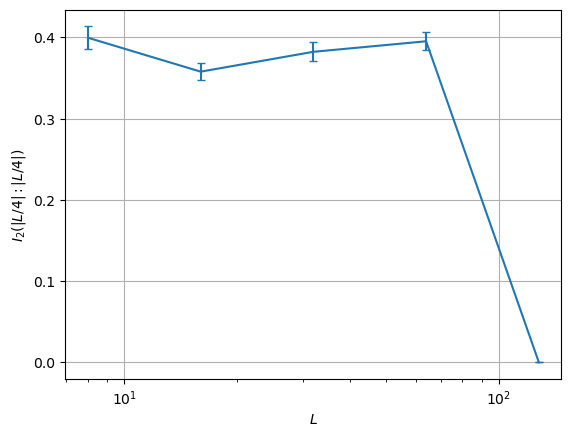

In [371]:
fig,ax=plt.subplots()
# for L_idx, L in enumerate(L_list):
ax.errorbar(x=L_list,y=MI.mean(axis=-1)[:,0],yerr=MI.std(axis=-1)[:,0]/np.sqrt(MI.shape[-1]),capsize=3,)
# ax.legend()
ax.set_xscale('log')
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

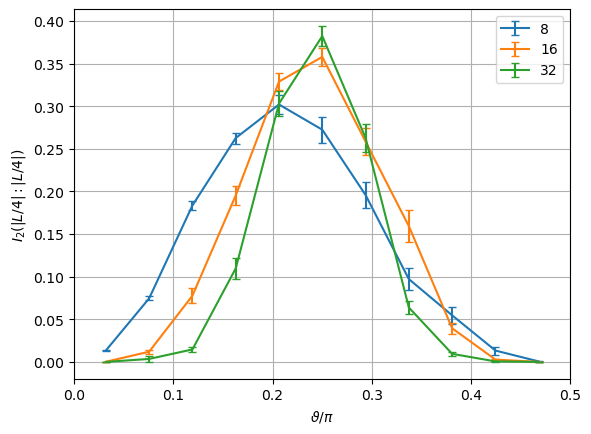

In [85]:
fig,ax=plt.subplots()
for L_idx, L in enumerate(L_list):
    ax.errorbar(x=vartheta/np.pi,y=MI.mean(axis=-1)[L_idx],yerr=MI.std(axis=-1)[L_idx]/np.sqrt(MI.shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim([0,0.5])
ax.set_xlabel(r'$\vartheta/\pi$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

Text(0, 0.5, '$S_{L/2}$')

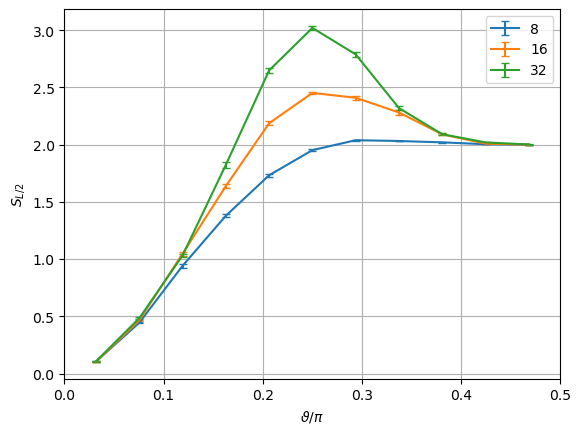

In [87]:
fig,ax=plt.subplots()
for L_idx, L in enumerate(L_list):
    ax.errorbar(x=vartheta/np.pi,y=EE.mean(axis=-1)[L_idx]/np.log(2),yerr=EE.std(axis=-1)[L_idx]/np.sqrt(EE.shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim([0,0.5])
ax.set_xlabel(r'$\vartheta/\pi$')
ax.set_ylabel(r'$S_{L/2}$')

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

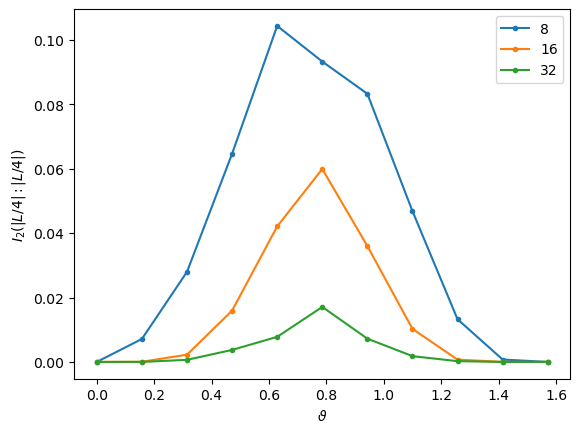

In [ ]:
for L_idx, L in enumerate(L_list):
    plt.plot(vartheta,MI.mean(axis=-1)[L_idx],'.-',label=L)
plt.legend()
plt.xlabel(r'$\vartheta$')
plt.ylabel(r'$I_2(|L/4|:|L/4|)$')

In [145]:
np.cos(np.pi/2-1e-2)

0.009999833334166736

In [158]:
np.linspace(0,3,61)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  ])

In [163]:
np.cos(np.pi/2*0.9)

0.15643446504023092

In [353]:
np.arccos(0.01)/np.pi

0.4968168480841269

In [348]:
ensemble_size=200
L_list=[8,16,]
# vartheta=np.linspace(1e-1,np.pi/2-1e-1,11)
# vartheta=np.array([np.pi/2*0.95])
r_list=np.linspace(-4,4,41)
# r_list=np.linspace(0,1,21)
# A_list=np.cos(vartheta)
A_list=[0.01]
# iteration_list=[(L,s,thres) for L in L_list for s in ensemble_size for thres in A_list]

MI=np.zeros((len(L_list),len(A_list),len(r_list),ensemble_size))
EE=np.zeros((len(L_list),len(A_list),len(r_list),ensemble_size))
for L_idx, L in enumerate(L_list):
    for A_idx,thres in (enumerate(A_list)):
        for r_idx,r in tqdm(enumerate(r_list),total=len(r_list)):
            for s_idx,s in enumerate(range(ensemble_size)):
                MI[L_idx,A_idx,r_idx,s_idx],EE[L_idx,A_idx,r_idx,s_idx]=run_single_class_AIII_r(L=L,seed=s,A=thres,r=r)

# z=[run_single_class_A(L=8,seed=s,A=0.6,B=0.6) for s in tqdm(range(100))]

100%|██████████| 41/41 [08:30<00:00, 12.45s/it]


Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

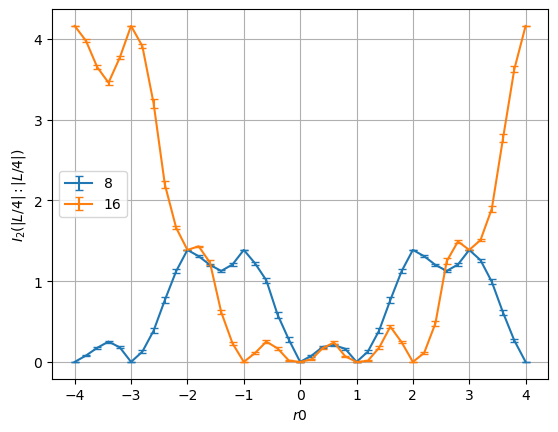

In [349]:
fig,ax=plt.subplots()
for L_idx, L in enumerate(L_list):
    ax.errorbar(x=r_list,y=MI.mean(axis=-1)[L_idx,0],yerr=MI.std(axis=-1)[L_idx,0]/np.sqrt(MI.shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$r0$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

Text(0, 0.5, '$S_{L/2} [log(2)]$')

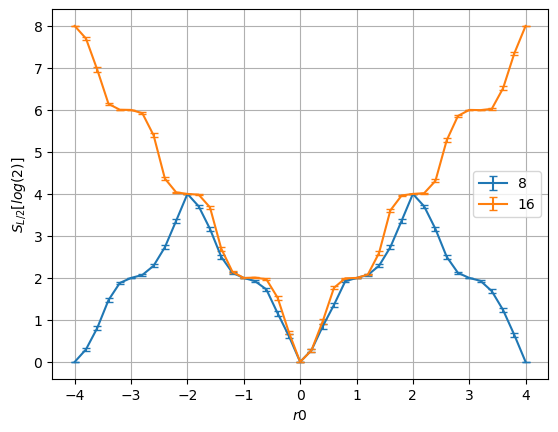

In [350]:
fig,ax=plt.subplots()
for L_idx, L in enumerate(L_list):
    ax.errorbar(x=r_list,y=EE.mean(axis=-1)[L_idx,0]/np.log(2),yerr=EE.std(axis=-1)[L_idx,0]/np.sqrt(EE.shape[-1])/np.log(2),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$r0$')
ax.set_ylabel(r'$S_{L/2} [log(2)]$')

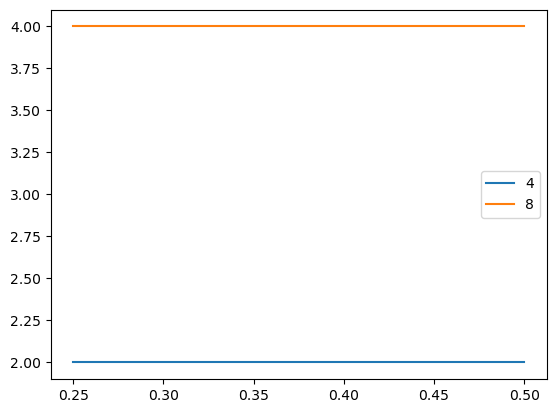

In [335]:
for L_idx, L in enumerate(L_list):
    plt.plot(thres_list,den.mean(axis=-1)[L_idx],label=L)
plt.legend()

In [299]:
# A=0.6
np.mean(z)

0.19039826024976436

In [295]:
# A=0.5
np.mean(z)

0.1675718094921357

In [297]:
# A=0.4
np.mean(z)

0.1401812088365208

In [40]:
O,U,A_D=block_diagonalize(gtn.C_m_history[-10])

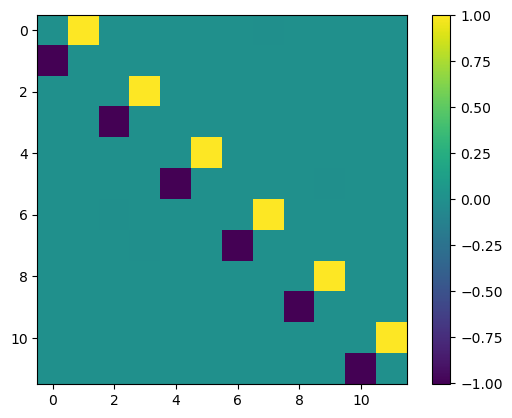

In [41]:
plt.imshow(A_D)
plt.colorbar()

In [42]:
np.round(A_D,3)

array([[ 0.   ,  1.004, -0.   , -0.   , -0.   , -0.   ,  0.   , -0.   ,
        -0.   ,  0.   ,  0.   ,  0.   ],
       [-1.004, -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   , -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   ,  0.   ,  0.   ],
       [ 0.   , -0.   , -1.   , -0.   , -0.   , -0.   , -0.   ,  0.   ,
        -0.   , -0.   ,  0.   ,  0.   ],
       [ 0.   , -0.   ,  0.   ,  0.   ,  0.   ,  1.   , -0.   , -0.   ,
        -0.   , -0.   ,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.   ,  0.   , -1.   , -0.   , -0.   ,  0.   ,
         0.   , -0.   ,  0.   , -0.   ],
       [-0.   , -0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  1.   ,
        -0.   , -0.   , -0.   ,  0.   ],
       [ 0.   , -0.   , -0.   , -0.   ,  0.   ,  0.   , -1.   , -0.   ,
        -0.   ,  0.   , -0.   ,  0.   ],
       [ 0.   , -0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,
         0.   ,  1.   , 

In [74]:
np.allclose(O.T@A_D@O,(gtn.C_m_history[-10]))

False

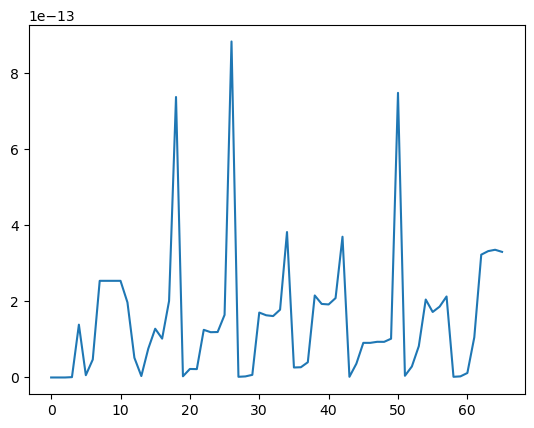

In [131]:
plt.plot([np.abs(np.diag(m@m)+1).max() for m in gtn.C_m_history])

In [152]:
density[50]

4.000002100455394

In [159]:
np.diag(gtn.C_m_history[49],k=1)

array([-0.04447649,  0.71313854,  0.06162586,  0.31056759,  0.03056169,
        0.40384676, -0.01751996, -0.19677932,  0.02474369, -0.82602062,
       -0.05238477,  0.07588696,  0.02175339,  0.34526779, -0.02430362])

Text(0.5, 1.0, '[0,1,2,3] [-0.966,0.926,-1.461,-1.111]')

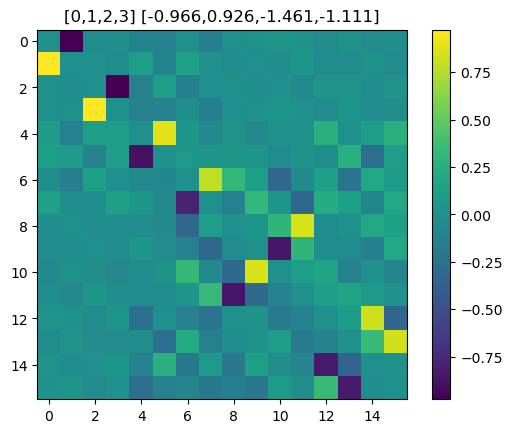

In [157]:
i=50
plt.imshow(gtn.C_m_history[i])
plt.colorbar()
plt.title('[{},{},{},{}]'.format(*gtn.i_history[i-1].tolist()) + ' [{:.3f},{:.3f},{:.3f},{:.3f}]'.format(*gtn.n_history[i-1]))

Text(0.5, 1.0, '[14,15,0,1] [-0.013,-0.028,0.772,-0.475]')

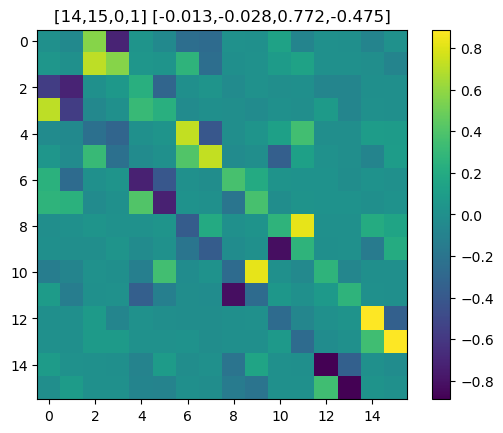

In [158]:
i=49
plt.imshow(gtn.C_m_history[i])
plt.colorbar()
plt.title('[{},{},{},{}]'.format(*gtn.i_history[i-1].tolist()) + ' [{:.3f},{:.3f},{:.3f},{:.3f}]'.format(*gtn.n_history[i-1]))

In [516]:
# gtn.measure_class_A(alpha=-0.99,beta=0,theta1=0,theta2=0,ix=np.arange(4))

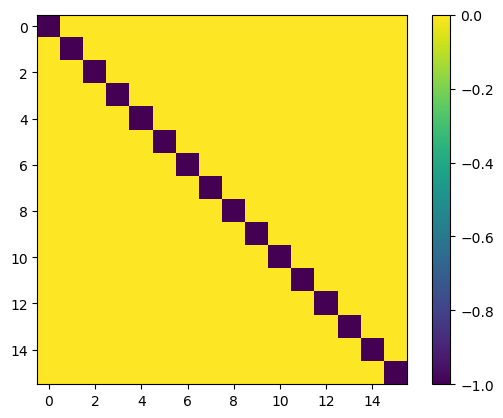

In [133]:
i=60
plt.imshow(gtn.C_m_history[i]@gtn.C_m_history[i])
plt.colorbar()

In [613]:
len(gtn.C_m_history)

37

In [ ]:
gtn.i_history

In [641]:
len(gtn.n_history)

36

In [647]:
gtn.i_history[i-1].tolist()

[10, 11, 0, 1]

In [708]:
gtn.op_class_A( gtn.n_history[34])

[-0.05975935985506711,
 -0.028042614701477953,
 -0.744601864433796,
 -0.040391080111737754]

Text(0.5, 1.0, '[8,9,10,11] [0.930,0.923,0.135,2.770]')

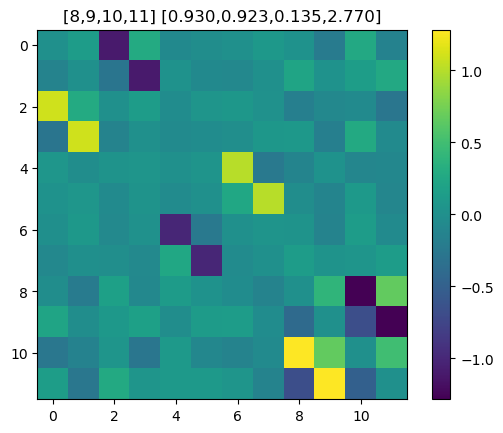

In [707]:
i=34
plt.imshow(gtn.C_m_history[i])
plt.colorbar()
plt.title('[{},{},{},{}]'.format(*gtn.i_history[i-1].tolist()) + ' [{:.3f},{:.3f},{:.3f},{:.3f}]'.format(*gtn.n_history[i-1]))

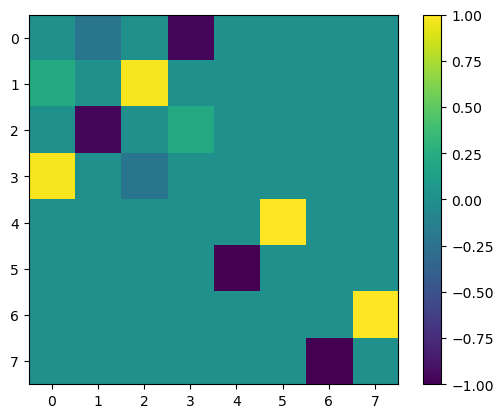

In [65]:
plt.imshow(gtn.C_m_history[3])
plt.colorbar()

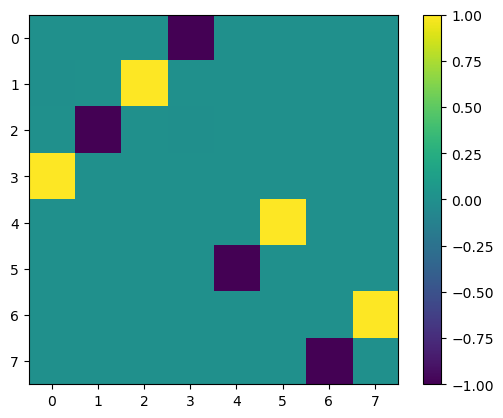

In [227]:
plt.imshow(gtn.C_m_history[-1])
plt.colorbar()

In [42]:
gtn.measure([[0,1/np.sqrt(2),1/np.sqrt(2)]], [1,2])
gtn.measure([[1,0,0]], [0,1])
# gtn.measure([[0,1,0]], [0,1])

In [43]:
gtn.C_m_history[-1]

array([[ 0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

In [44]:
gtn.kraus([0,0,-1])

array([[ 0,  0,  0, -1],
       [ 0,  0,  1,  0],
       [ 0, -1,  0,  0],
       [ 1,  0,  0,  0]])

In [45]:
gtn.kraus([0,1,0])

array([[ 0,  0,  1,  0],
       [ 0,  0,  0,  1],
       [-1,  0,  0,  0],
       [ 0, -1,  0,  0]])

In [201]:
gtn.op_class_A(alpha=0,kind='L')

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  0., -0., -0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0., -0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.]])

In [246]:
gtn.op_class_A(alpha=0.1,kind='R')

array([[ 0.        , -0.22275537,  0.22275537,  0.        ,  0.9476383 ,
         0.        ,  0.        , -0.0523617 ],
       [ 0.22275537,  0.        ,  0.        ,  0.22275537,  0.        ,
         0.9476383 ,  0.0523617 ,  0.        ],
       [-0.22275537,  0.        ,  0.        , -0.22275537,  0.        ,
         0.0523617 ,  0.9476383 ,  0.        ],
       [ 0.        , -0.22275537,  0.22275537,  0.        , -0.0523617 ,
         0.        ,  0.        ,  0.9476383 ],
       [-0.9476383 ,  0.        ,  0.        ,  0.0523617 ,  0.        ,
         0.22275537, -0.22275537,  0.        ],
       [ 0.        , -0.9476383 , -0.0523617 ,  0.        , -0.22275537,
         0.        ,  0.        , -0.22275537],
       [ 0.        , -0.0523617 , -0.9476383 ,  0.        ,  0.22275537,
         0.        ,  0.        ,  0.22275537],
       [ 0.0523617 ,  0.        ,  0.        , -0.9476383 ,  0.        ,
         0.22275537, -0.22275537,  0.        ]])

In [248]:
np.abs(gtn.op_class_A(alpha=.1,kind='R')-ref).max()

3.788615643429694e-09

In [247]:
ref=np.array([[ 0.        , -0.22275537,  0.22275537,  0.        ,  0.9476383 ,
         0.        ,  0.        , -0.0523617 ],
       [ 0.22275537,  0.        ,  0.        ,  0.22275537,  0.        ,
         0.9476383 ,  0.0523617 ,  0.        ],
       [-0.22275537,  0.        ,  0.        , -0.22275537,  0.        ,
         0.0523617 ,  0.9476383 ,  0.        ],
       [ 0.        , -0.22275537,  0.22275537,  0.        , -0.0523617 ,
         0.        ,  0.        ,  0.9476383 ],
       [-0.9476383 ,  0.        ,  0.        ,  0.0523617 ,  0.        ,
         0.22275537, -0.22275537,  0.        ],
       [ 0.        , -0.9476383 , -0.0523617 ,  0.        , -0.22275537,
         0.        ,  0.        , -0.22275537],
       [ 0.        , -0.0523617 , -0.9476383 ,  0.        ,  0.22275537,
         0.        ,  0.        ,  0.22275537],
       [ 0.0523617 ,  0.        ,  0.        , -0.9476383 ,  0.        ,
         0.22275537, -0.22275537,  0.        ]])

In [46]:
gtn.kraus([1/np.sqrt(2),1/np.sqrt(2),0])

array([[ 0.        ,  0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.        ,  0.        ,  0.70710678],
       [-0.70710678,  0.        ,  0.        , -0.70710678],
       [ 0.        , -0.70710678,  0.70710678,  0.        ]])

In [47]:
gtn.kraus([0,-1,0])

array([[ 0,  0, -1,  0],
       [ 0,  0,  0, -1],
       [ 1,  0,  0,  0],
       [ 0,  1,  0,  0]])

In [10]:
gtn.kraus([1,0,0])

array([[ 0,  1,  0,  0],
       [-1,  0,  0,  0],
       [ 0,  0,  0, -1],
       [ 0,  0,  1,  0]])

In [11]:
gtn.kraus([-1,0,0])

array([[ 0, -1,  0,  0],
       [ 1,  0,  0,  0],
       [ 0,  0,  0,  1],
       [ 0,  0, -1,  0]])

In [36]:
gtn.measure([[0,0,1],],np.array([0,1]))

In [37]:
gtn.C_m_history[-1]

array([[ 0.,  1.],
       [-1.,  0.]])

In [6]:
gtn.kraus([1,0,0])

array([[ 0,  1,  0,  0],
       [-1,  0,  0,  0],
       [ 0,  0,  0, -1],
       [ 0,  0,  1,  0]])

In [8]:
gtn.kraus([-1,0,0])

array([[ 0, -1,  0,  0],
       [ 1,  0,  0,  0],
       [ 0,  0,  0,  1],
       [ 0,  0, -1,  0]])

In [11]:
gtn.C_m_history[-1]

array([[ 0.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.]])

In [34]:
gtn.kraus([0,1/np.sqrt(2),1/np.sqrt(2)])

array([[ 0.        ,  0.        ,  0.70710678,  0.70710678],
       [ 0.        ,  0.        , -0.70710678,  0.70710678],
       [-0.70710678,  0.70710678,  0.        ,  0.        ],
       [-0.70710678, -0.70710678,  0.        ,  0.        ]])

In [22]:
g=gtn.kraus([0,1,0])

In [237]:
g=g[[0,2,1,3],:]
g=g[:,[0,2,1,3]]

In [238]:
gtn.von_Neumann_entropy_m([0],g)

1.5707963267948966e-18

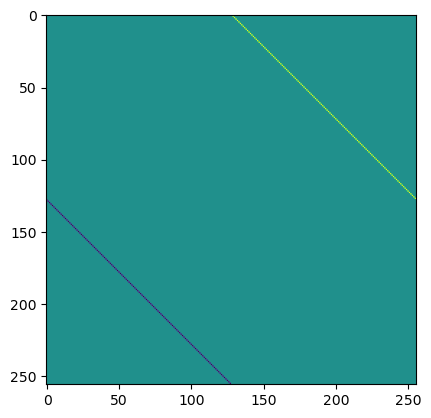

In [182]:
plt.imshow(gtn.C_m_history[0])

In [167]:
gtn.von_Neumann_entropy_m(np.arange(gtn.L))/np.log(2)

32.0

In [410]:
gtn2=GTN(L=4,seed=2,op=False)
# gtn2.measure([[0,np.sqrt(1/2),-np.sqrt(1/2)],[0,-0.1,np.sqrt(1-0.1**2)]],np.array([1,2,3,4]))
gtn2.measure_all_sync(0, 0, 1, 1,even=False)
gtn2.measure_all_sync(0, 0, 1, 1,even=True)

In [413]:
gtn.von_Neumann_entropy_m(range(gtn.L//2))

0.845082507932084

In [414]:
gtn2.von_Neumann_entropy_m(range(gtn.L//2))

0.8450825079320842

In [415]:
np.round(gtn.C_m_history[-1],2)

array([[ 0.  , -0.52, -0.19, -0.66, -0.2 , -0.11,  0.41,  0.2 ],
       [ 0.52,  0.  , -0.03,  0.33, -0.01, -0.64,  0.11,  0.45],
       [ 0.19,  0.03,  0.  ,  0.14, -0.85, -0.07,  0.05, -0.46],
       [ 0.66, -0.33, -0.14,  0.  ,  0.39,  0.18,  0.01, -0.51],
       [ 0.2 ,  0.01,  0.85, -0.39,  0.  , -0.14, -0.24, -0.04],
       [ 0.11,  0.64,  0.07, -0.18,  0.14,  0.  ,  0.7 , -0.16],
       [-0.41, -0.11, -0.05, -0.01,  0.24, -0.7 ,  0.  , -0.52],
       [-0.2 , -0.45,  0.46,  0.51,  0.04,  0.16,  0.52,  0.  ]])

In [416]:
np.round(gtn2.C_m_history[-1],2)

array([[ 0.  , -0.52,  0.19, -0.66,  0.2 , -0.11, -0.41,  0.2 ],
       [ 0.52,  0.  , -0.03, -0.33, -0.01,  0.64,  0.11, -0.45],
       [-0.19,  0.03,  0.  ,  0.14,  0.85, -0.07, -0.05, -0.46],
       [ 0.66,  0.33, -0.14,  0.  ,  0.39, -0.18,  0.01,  0.51],
       [-0.2 ,  0.01, -0.85, -0.39,  0.  , -0.14,  0.24, -0.04],
       [ 0.11, -0.64,  0.07,  0.18,  0.14,  0.  ,  0.7 ,  0.16],
       [ 0.41, -0.11,  0.05, -0.01, -0.24, -0.7 ,  0.  , -0.52],
       [-0.2 ,  0.45,  0.46, -0.51,  0.04, -0.16,  0.52,  0.  ]])

In [363]:
gtn.C_m_history[-1]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [-0.,  0., -1.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-0.,  0., -0.,  0., -1.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-0.,  0., -0.,  0., -0.,  0., -1.,  0.]])

In [165]:
gtn.measure([[0,1/np.sqrt(2),1/np.sqrt(2)]],np.array([0,1]))

In [275]:
gtn.measure([[0,1/np.sqrt(2),1/np.sqrt(2)]],np.array([3,0]))

In [364]:
# gtn.measure([[0.9,np.sqrt(1-0.9**2),0]],np.array([1,2]))
gtn.measure([[0,np.sqrt(1/2),np.sqrt(1/2)]]*3,np.array([1,2,3,4,5,0]))
# gtn.measure([[0.9,np.sqrt(1-0.9**2),0]],np.array([3,4]))

In [335]:
neg=np.round(gtn.C_m_history[-1],3)

In [338]:
pos=np.round(gtn.C_m_history[-1],3)

In [339]:
neg,pos

(array([[ 0. ,  0.5,  0.5,  0.5,  0.5,  0. ],
        [-0.5,  0. ,  0. ,  0.5, -0.5,  0.5],
        [-0.5,  0. ,  0. , -0.5,  0.5,  0.5],
        [-0.5, -0.5,  0.5,  0. ,  0. , -0.5],
        [-0.5,  0.5, -0.5,  0. ,  0. , -0.5],
        [ 0. , -0.5, -0.5,  0.5,  0.5,  0. ]]),
 array([[ 0. ,  0.5, -0.5,  0.5, -0.5,  0. ],
        [-0.5,  0. ,  0. , -0.5, -0.5, -0.5],
        [ 0.5,  0. ,  0. , -0.5, -0.5,  0.5],
        [-0.5,  0.5,  0.5,  0. ,  0. ,  0.5],
        [ 0.5,  0.5,  0.5,  0. ,  0. , -0.5],
        [ 0. ,  0.5, -0.5, -0.5,  0.5,  0. ]]))

In [251]:
gtn.C_m_history[-1]

array([[ 0.        ,  0.        ,  0.43588989,  0.9       ],
       [ 0.        ,  0.        ,  0.9       , -0.43588989],
       [-0.43588989, -0.9       ,  0.        ,  0.        ],
       [-0.9       ,  0.43588989,  0.        ,  0.        ]])

In [ ]:
gtn.C_m_history[-1]

array([[ 0.        , -0.1       , -0.99498744,  0.        ],
       [ 0.1       ,  0.        ,  0.        ,  0.99498744],
       [ 0.99498744,  0.        ,  0.        , -0.1       ],
       [ 0.        , -0.99498744,  0.1       ,  0.        ]])

In [72]:
gtn.measure_all_sync(a1=.5, a2=.9, b1=1, b2=1,even=True,theta_list=0,phi_list=0,Born=True)

In [77]:
np.round(gtn.C_m_history[-1],3)

array([[-0.   , -0.914,  0.   ,  0.   , -0.159,  0.372,  0.   ,  0.   ],
       [ 0.914, -0.   ,  0.   ,  0.   , -0.372, -0.159,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.   , -0.919,  0.   ,  0.   , -0.331, -0.215],
       [ 0.   ,  0.   ,  0.919, -0.   ,  0.   ,  0.   ,  0.215, -0.331],
       [ 0.159,  0.372,  0.   ,  0.   , -0.   ,  0.914,  0.   ,  0.   ],
       [-0.372,  0.159,  0.   ,  0.   , -0.914, -0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.331, -0.215,  0.   ,  0.   , -0.   ,  0.919],
       [ 0.   ,  0.   ,  0.215,  0.331,  0.   ,  0.   , -0.919, -0.   ]])

In [78]:
gtn.von_Neumann_entropy_m(np.arange(gtn.L))

0.3463744671333685

In [79]:
vk=gtn.n_history[0][:,0]

In [82]:
np.sum(-(1-vk)/2*np.log((1-vk)/2)-(1+vk)/2*np.log((1+vk)/2))

0.3463744671333685

In [563]:
gtn.measure_all_sync(a1=.5, a2=.9, b1=1, b2=1,even=True,theta_list=0,phi_list=0,Born=True)
gtn.measure_all_sync(a1=.5, a2=.9, b1=1, b2=1,even=False,theta_list=np.pi/2,phi_list=np.pi/2,Born=True)

In [ ]:
np.round(gtn.C_m_history[-1],3)

array([[ 0.   ,  0.238, -0.239, -0.364, -0.266,  0.166, -0.755,  0.293],
       [-0.238,  0.   , -0.762,  0.401, -0.016, -0.069, -0.126, -0.425],
       [ 0.239,  0.762,  0.   ,  0.488,  0.057, -0.112,  0.083,  0.317],
       [ 0.364, -0.401, -0.488,  0.   ,  0.269,  0.03 ,  0.175,  0.604],
       [ 0.266,  0.016, -0.057, -0.269,  0.   , -0.911, -0.095, -0.123],
       [-0.166,  0.069,  0.112, -0.03 ,  0.911,  0.   , -0.347, -0.068],
       [ 0.755,  0.126, -0.083, -0.175,  0.095,  0.347,  0.   , -0.498],
       [-0.293,  0.425, -0.317, -0.604,  0.123,  0.068,  0.498,  0.   ]])

In [550]:
gtn.measure([[1/np.sqrt(2),-1/np.sqrt(2),0]], [2,3])
gtn.measure([[1/np.sqrt(2),1/np.sqrt(2),0]], [0,1])

In [546]:
np.round(gtn.C_m_history[-1],3)

array([[ 0.   ,  0.873,  0.068,  0.104,  0.156, -0.076,  0.412, -0.15 ],
       [-0.873,  0.   ,  0.217, -0.114,  0.073,  0.031,  0.116,  0.397],
       [-0.068, -0.217,  0.   ,  0.944,  0.083, -0.093,  0.194,  0.057],
       [-0.104,  0.114, -0.944,  0.   ,  0.094,  0.026, -0.017,  0.273],
       [-0.156, -0.073, -0.083, -0.094,  0.   , -0.947, -0.066, -0.232],
       [ 0.076, -0.031,  0.093, -0.026,  0.947,  0.   , -0.295,  0.02 ],
       [-0.412, -0.116, -0.194,  0.017,  0.066,  0.295,  0.   , -0.829],
       [ 0.15 , -0.397, -0.057, -0.273,  0.232, -0.02 ,  0.829,  0.   ]])

In [551]:
np.round(gtn.C_m_history[-1],3)

array([[ 0.   ,  0.873,  0.068,  0.104,  0.156, -0.076,  0.412, -0.15 ],
       [-0.873,  0.   ,  0.217, -0.114,  0.073,  0.031,  0.116,  0.397],
       [-0.068, -0.217,  0.   ,  0.944,  0.083, -0.093,  0.194,  0.057],
       [-0.104,  0.114, -0.944,  0.   ,  0.094,  0.026, -0.017,  0.273],
       [-0.156, -0.073, -0.083, -0.094,  0.   , -0.947, -0.066, -0.232],
       [ 0.076, -0.031,  0.093, -0.026,  0.947,  0.   , -0.295,  0.02 ],
       [-0.412, -0.116, -0.194,  0.017,  0.066,  0.295,  0.   , -0.829],
       [ 0.15 , -0.397, -0.057, -0.273,  0.232, -0.02 ,  0.829,  0.   ]])

In [488]:
gtn.von_Neumann_entropy_m(np.arange(gtn.L)+gtn.L)

0.7680219731036124

In [241]:
i

63

In [475]:
np.round(rotate(np.array([[1,0,0]]*3), [0,np.pi/4,np.pi/2],[np.pi/2]*3),3)

array([[0.   , 0.   , 1.   ],
       [0.   , 0.707, 0.707],
       [0.   , 1.   , 0.   ]])

In [125]:
zz=np.arange(36).reshape((6,6))

In [85]:
zz

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [187]:
swap(zz,[1,2])

In [186]:
zz

array([[ 0,  4,  5,  3,  1,  2],
       [24, 28, 29, 27, 25, 26],
       [30, 34, 35, 33, 31, 32],
       [18, 22, 23, 21, 19, 20],
       [ 6, 10, 11,  9,  7,  8],
       [12, 16, 17, 15, 13, 14]])

In [188]:
zz

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [89]:
zz[np.ix_([1,2],[1,2])]

array([[ 7,  8],
       [13, 14]])

In [119]:
# zz=get_Born(b2=.3,a2=.2, a1=.5,b1= 1,Gamma=np.linspace(-1,1,1000))
z0=get_random_tri_op(.5, 10000)
# z0=get_Born_tri_op(.5,10000,Gamma=np.array([.5]*10000))
# z0=get_random(a1=0.5, b1=.6, b2=1, a2=.5,rng=0,num=2000,theta_list=0,phi_list=0)
# z1=get_random(b2=.3,a2=.2, a1=.5,b1= 1,rng=0,num=1,theta_list=np.pi/2,phi_list=np.pi/2)

(array([2551.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 4885.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 2564.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

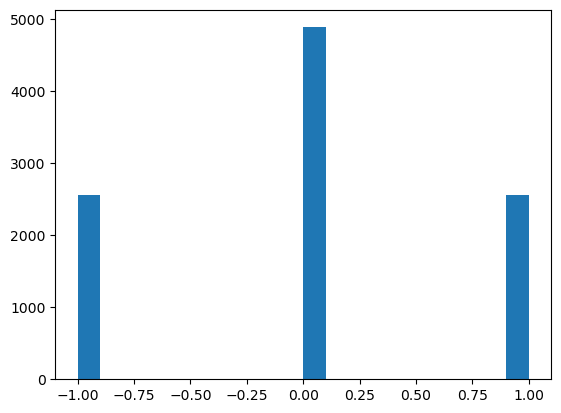

In [120]:
plt.hist(z0[:,0],density=False,bins=20)

(array([0.76151494, 0.47901746, 0.44626413, 0.43398163, 0.44012288,
        0.48106454, 0.49948829, 0.47492329, 0.51995912, 0.50153537,
        0.49744121, 0.51177079, 0.47697038, 0.46264079, 0.46468788,
        0.48925288, 0.41965205, 0.49129996, 0.39303997, 0.75537369]),
 array([-9.99999754e-01, -8.99999766e-01, -7.99999778e-01, -6.99999791e-01,
        -5.99999803e-01, -4.99999815e-01, -3.99999828e-01, -2.99999840e-01,
        -1.99999852e-01, -9.99998648e-02,  1.22878912e-07,  1.00000111e-01,
         2.00000098e-01,  3.00000086e-01,  4.00000073e-01,  5.00000061e-01,
         6.00000049e-01,  7.00000036e-01,  8.00000024e-01,  9.00000012e-01,
         9.99999999e-01]),
 <BarContainer object of 20 artists>)

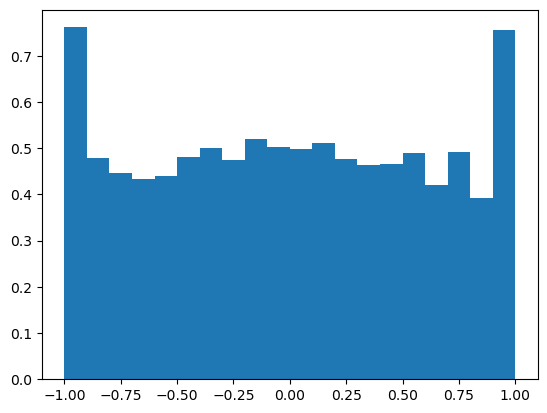

In [122]:
plt.hist(z0[np.abs(z0[:,0])<1,2],density=True,bins=20)

In [27]:
zz=get_Born(a1=0.7, b1=1, b2=1, a2=0, Gamma=np.array([-1]*1000000))

NameError: name 'get_Born' is not defined

In [380]:
# zz=np.vstack([get_Born_A(a1=0.7, b1=.9, b2=.9, a2=0.7,Gamma=np.array([1,])) for i in range(10000)])
# zz=[get_random_phi(0.1, 1, np.random.uniform()) for i in range(1000)]

In [85]:
zz=np.vstack([get_Born_B(a1=0.5, b1=1, b2=1, a2=.4,Gamma=np.array([1,])) for i in range(50000)])
# zz=np.vstack([get_Born_A(a1=0.5, b1=1, b2=1, a2=.4,Gamma=np.array([1,])) for i in range(50000)])

(-1.0, 1.0)

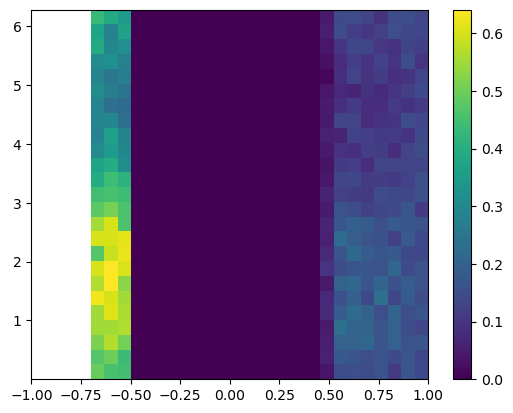

In [38]:
plt.hist2d(*zz.T,density=True,bins=(25, 25))
plt.colorbar()
plt.xlim(-1,1)

In [50]:
def p(s,phi,a1,a2,b1,b2,Gamma):
    omega=((a1+b1)/((b2-a2)*(a1+a2+b1+b2)))*(s<=b2)*(s>=a2)+((a2+b2)/((b1-a1)*(a1+a2+b1+b2)))*(s>=-b1)*(s<=-a1)
    # return omega
    return omega*(1+np.sqrt(1-s**2)*np.sin(phi)*Gamma)/(2*np.pi)


In [84]:
s_list=np.linspace(-1,1,1001)
phi_list=np.linspace(0,2*np.pi,1001)
S_list,Phi_list=np.meshgrid(s_list,phi_list)
pdf=p(S_list,Phi_list,a1=0.5, b1=.7, b2=1, a2=.5,Gamma=.5)

/tmp/ipykernel_24812/1417036197.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(s_list,phi_list,pdf)


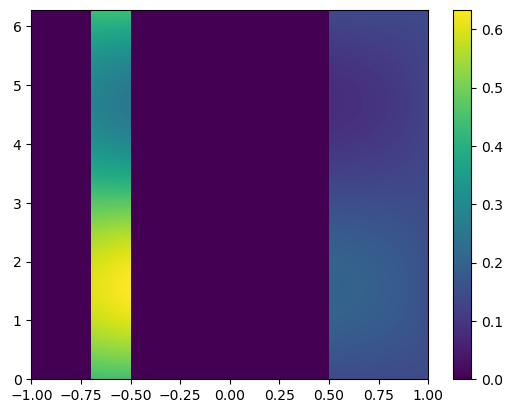

In [85]:
plt.pcolormesh(s_list,phi_list,pdf)
plt.colorbar()

In [79]:
s_list[0]-s_list[1]

-0.020000000000000018

In [82]:
2/100

0.02

In [86]:
pdf.sum()*4*np.pi/(1000*1000)

1.008340666666667

array([0.        , 0.        , 0.        , ..., 0.88977778, 0.88977778,
       0.88977778])

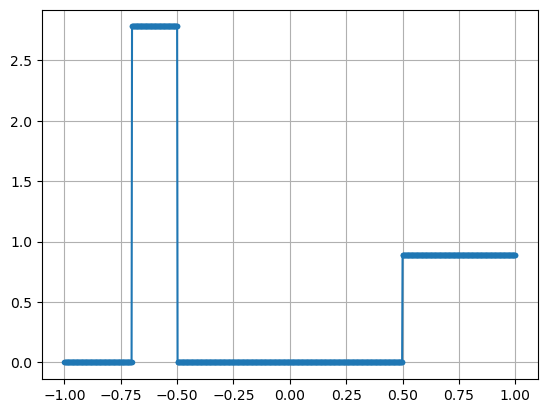

In [89]:
plt.plot(s_list,pdf.sum(axis=0)*2*np.pi/(1000),'.-')
plt.grid('on')

In [370]:
def f(s,Gamma,phi):
    return (1+np.sqrt(1-s**2)*Gamma*np.sin(phi))/(2*np.pi)

In [372]:
x=np.linspace(0,2*np.pi)

(-1.0, 1.0)

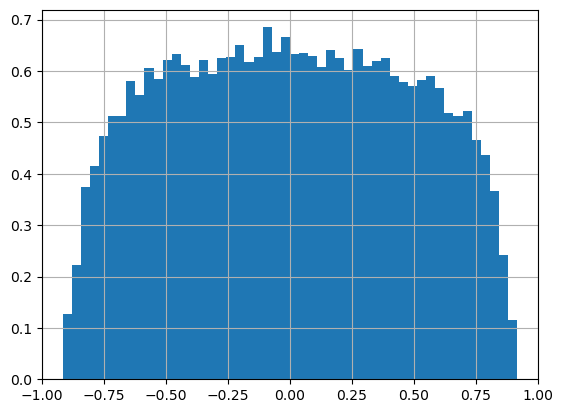

In [88]:
fig,ax=plt.subplots()
# ax.hist(zz,bins=30,density=True)
# ax.plot(x,f(0.1,1,x))
# ax.hist(zz[zz[:,1]<0,0],bins=30,density=True)
# ax.hist(zz[zz[:,1]>0,0],bins=30,density=True)
ax.hist(zz[:,2],bins=50,density=True)
# ax.hist(np.sqrt(1-zz[:,0]**2)*np.sin(zz[:,1]),bins=30,density=True)
# ax.hist(np.sqrt(1-zz[:,0]**2)*np.cos(zz[:,1]),bins=30,density=True)

# ax.hist(np.sqrt(zz[:,0]**2+zz[:,2]**2),bins=30,density=True)
ax.grid('on')
ax.set_xlim([-1,1])
# ax.set_ylim([0,1])

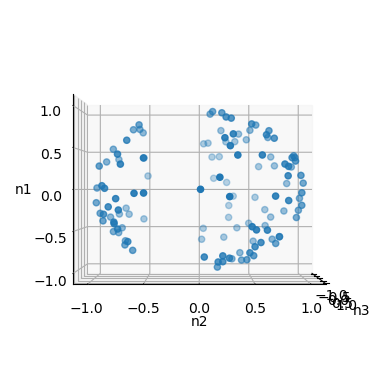

In [126]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# zz=np.array(gtn.n_history[:32])
ax.scatter(zz[:,2],zz[:,1],zz[:,0])
ax.set_xlabel('n3')
ax.set_ylabel('n2')
ax.set_zlabel('n1')
ax.view_init(azim=0,elev=0)

In [321]:
gtn=GTN(L=2,seed=2)
gtn.measure([[1,0,0],[1,0,0]], [1,2,3,0])
np.round(gtn.C_m_history[-1],3)

array([[ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [347]:
gtn_orig=GTN(L=3,seed=2)
# gtn_orig.measure([[1,0,0]], [1,2])
# gtn_orig.measure([[1,0,0]], [3,4])
gtn_orig.measure([[1,0,0]], [5,0])
# gtn_orig.measure([[1,0,0]], [3,0])
np.round(gtn_orig.C_m_history[-1],3)

array([[ 0.,  0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
gtn_orig=GTN(L=4,seed=2)
gtn_orig.measure([[1,0,0]], [3,4])
gtn_orig.measure([[1,0,0]], [1,2])
np.round(gtn_orig.C_m_history[-1],3)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [284]:
np.array_equal(gtn_orig.C_m_history[-1], gtn.C_m_history[-1])

True

In [184]:
gtn_orig_2=GTN(L=2,seed=2)
gtn_orig_2.measure([[1,0,0]], [3,4])
gtn_orig_2.measure([[1,0,0]], [1,2])
np.round(gtn_orig_2.C_m_history[-1],3)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [185]:
gtn_orig_2.C_m_history[-1]==gtn_orig.C_m_history[-1]

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [176]:
np.round(gtn.C_m_history[-1],3)

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [482]:
gtn=GTN(L=4,seed=2)

In [480]:
gtn.measure_all(b2=1,a2= 0, a1=0,b1= 1,Born=False,even=True,theta_list=0,phi_list=0)
gtn.measure_all(b2=1,a2= 0, a1=0,b1= 1,Born=False,even=False,theta_list=np.pi/2,phi_list=np.pi/2)

In [483]:
gtn.measure_all_sync(b2=1,a2= 0, a1=0,b1= 1,Born=False,even=True,theta_list=0,phi_list=0)
gtn.measure_all_sync(b2=1,a2= 0, a1=0,b1= 1,Born=False,even=False,theta_list=np.pi/2,phi_list=np.pi/2)

In [484]:
gtn.mutual_information_cross_ratio()

0.2993099195910174

In [481]:
gtn.mutual_information_cross_ratio()

0.2993099195910174

In [ ]:
gtn.mutual_information_cross_ratio()

0.4530013255727704

In [ ]:
gtn.n_history

In [ ]:
gtn.n_history

In [429]:
L=512

In [443]:
def profile():
    gtn=GTN(L=L,seed=1,history=False)
    iteration=range(1)
    for i in iteration:
        gtn.measure_all(b2=1,a2= .9999, a1=.9999,b1= 1,Born=False,even=True,theta_list=0,phi_list=0)
        gtn.measure_all(b2=1,a2= .9999, a1=.9999,b1= 1,Born=False,even=False,theta_list=np.pi/2,phi_list=np.pi/2)

In [441]:
profile()

In [ ]:
%lprun -f _contraction profile()

In [489]:
L=64
iteration=np.arange(100)
MI=np.zeros((iteration.shape[0],))
gtn=GTN(L=L,seed=0)
for i in iteration:
    gtn.measure_all_sync(b2=1,a2= .999, a1=.999,b1= 1,even=True,theta_list=0,phi_list=0)
    gtn.measure_all_sync(b2=1,a2= .999, a1=.999,b1= 1,even=False,theta_list=np.pi/2,phi_list=np.pi/2)
    # MI[i]=(gtn.mutual_information_m(np.arange(gtn.L//2), gtn.L//2+np.arange(gtn.L//2)))
    MI[i]=gtn.mutual_information_cross_ratio()

In [519]:
L=64
iteration=np.arange(100)
MI=np.zeros((iteration.shape[0],))
gtn=GTN(L=L,seed=0)
for i in iteration:
    gtn.measure_all_sync(b2=1,a2= .999, a1=.999,b1= 1,even=True,theta_list=0,phi_list=0)
    gtn.measure_all_sync(b2=1,a2= .999, a1=.999,b1= 1,even=False,theta_list=np.pi/2,phi_list=0)
    # MI[i]=(gtn.mutual_information_m(np.arange(gtn.L//2), gtn.L//2+np.arange(gtn.L//2)))
    MI[i]=gtn.mutual_information_cross_ratio()

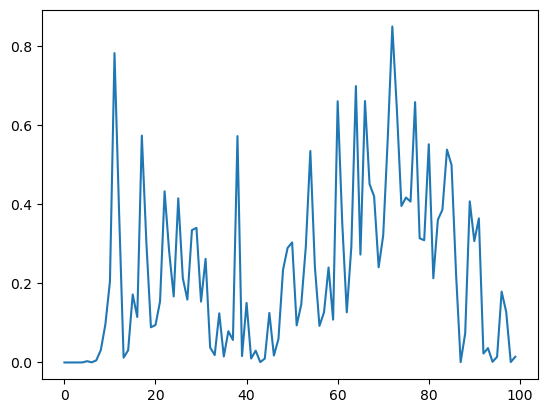

In [520]:
plt.plot(iteration,MI/np.log(2))

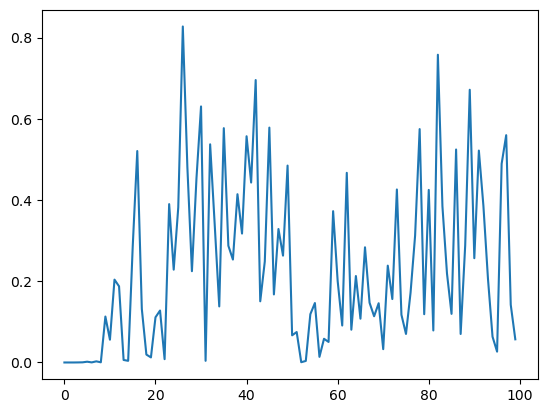

In [351]:
plt.plot(iteration,MI/np.log(2))

In [153]:
gtn=GTN(L=4,seed=1)
gtn.measure_all_sync(b2=1,a2=.999, a1=.999,b1= 1,Born=True,even=True,theta_list=np.pi/2,phi_list=0)

In [154]:
gtn.C_m_history[-1]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [56]:
gtn.C_m_history[-1]

array([[ 0.        ,  0.8793489 , -0.31069002, ..., -0.0505494 ,
         0.25427033,  0.24345584],
       [-0.8793489 ,  0.        , -0.03841756, ..., -0.04010213,
         0.22079822, -0.24877816],
       [ 0.31069002,  0.03841756,  0.        , ...,  0.01488309,
        -0.0755048 ,  0.08707611],
       ...,
       [ 0.0505494 ,  0.04010213, -0.01488309, ...,  0.        ,
        -0.19456474, -0.15580733],
       [-0.25427033, -0.22079822,  0.0755048 , ...,  0.19456474,
         0.        ,  0.90185994],
       [-0.24345584,  0.24877816, -0.08707611, ...,  0.15580733,
        -0.90185994,  0.        ]])

In [598]:
phi=np.pi/2

In [600]:
isinstance(phi,float)

True

In [57]:
iteration.shape

(64,)

# Tri-operators

In [539]:
L=32
gtn=GTN(L=L,seed=0,history=True,op=False,random_init=False,trijunction=False,pbc=False)

In [540]:

p=0.9
# odd=interpolation(gtn.L//4,gtn.L//4*3,p,1-p,gtn.L,k=1)
# even=interpolation(gtn.L//4,gtn.L//4*3,1-p,p,gtn.L,k=1)

odd=interpolation(gtn.L//4,gtn.L//4*3,1-p,p,gtn.L,k=1)
even=interpolation(gtn.L//4,gtn.L//4*3,p,1-p,gtn.L,k=1)


# odd=np.r_[interpolation(gtn.L//8,gtn.L//8*3,p,1-p,gtn.L//2,k=2) , interpolation(gtn.L//8,gtn.L//8*3,p,1-p,gtn.L//2,k=2)]
# even=np.r_[interpolation(gtn.L//8,gtn.L//8*3,1-p,p,gtn.L//2,k=2),interpolation(gtn.L//8,gtn.L//8*3,1-p,p,gtn.L//2,k=2)]

(0.0, 32.0)

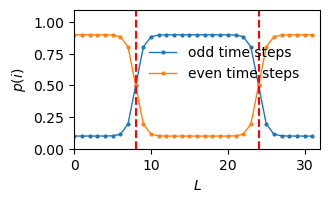

In [541]:
fig,ax=plt.subplots(figsize=(3.4,3.4/1.6),tight_layout=True)
ax.plot(odd,'.-',label='odd time steps',lw=1,markersize=4)
ax.plot(even,'.-',label='even time steps',lw=1,markersize=4)
ax.legend(loc=(.28,.45),frameon=False)
ax.set_xlabel('$L$')
ax.set_ylabel('$p(i)$')
ax.axvline(x=gtn.L//4,ls='dashed',color='r')
ax.axvline(x=gtn.L//4*3,ls='dashed',color='r')
ax.set_ylim([0,1.1])
ax.set_xlim([0,gtn.L])
# fig.savefig('../Rp_GTN/Fig/p_i.pdf')

In [548]:
L=32
# iteration=np.arange(L//2)
iteration=np.arange(16)
ensemble_size=1
MI=np.zeros((ensemble_size,iteration.shape[0],))
EC=np.zeros((ensemble_size,2*iteration.shape[0]+1,2*L))
EE=np.zeros((ensemble_size,iteration.shape[0],L//2-1))
# gtn_list=[]
# sigma=0.6
SL2=np.zeros((ensemble_size,iteration.shape[0]))
# p=0.1
v=0
for ensemble in range(ensemble_size):
    gtn=GTN(L=L,seed=1,history=True,op=False,random_init=False,trijunction=False,pbc=False)
    EC[ensemble,0]=gtn.entanglement_contour(np.arange(gtn.L))
    for i in (iteration):

        # gtn.measure_all_tri_op(p_list=p,Born=True,even=True) 
        # gtn.measure_all_tri_op(p_list=1-p,Born=True,even=False)
        # p_list_even=interpolation(gtn.L//4+(v*(2*i+2)),gtn.L//4*3+(v*(2*i+2)),p,1-p,gtn.L,k=2)
        gtn.measure_all_tri_op(p_list=even,Born=True,even=True)
        # print(f'{i} Even:\n {gtn.C_m_history[-1]}')
        # interpolation(gtn.L//4+(v*(2*i+1)),(gtn.L//4*3+(v*(2*i+1))),p,1-p,gtn.L,k=2)
        EC[ensemble,2*i+1]=gtn.entanglement_contour(np.arange(gtn.L))

        # p_list_odd=interpolation(gtn.L//4+(v*(2*i+2)),gtn.L//4*3+(v*(2*i+2)),1-p,p,gtn.L,k=2)
        gtn.measure_all_tri_op(p_list=odd,Born=True,even=False)
        # print(f'{i} Odd:\n {gtn.C_m_history[-1]}')
        # interpolation(gtn.L//4+(v*(2*i+2)),gtn.L//4*3+(v*(2*i+2)),1-p,p,gtn.L,k=2)

        # gtn.measure_all_tri_op(p_list=p,Born=False,even=True) 
        # gtn.measure_all_tri_op(p_list=1-p,Born=False,even=False)

        # gtn.measure_all_sync(b2=1,a2=.9, a1=.5,b1= 1,Born=True,even=True,theta_list=interpolate(gtn.L//4, gtn.L//4*3, 0, np.pi/2, gtn.L,k=1),phi_list=0)
        # gtn.measure_all_sync(b2=1,a2=.9, a1=.5,b1= 1,Born=True,even=False,theta_list=interpolate(gtn.L//4, gtn.L//4*3, np.pi/2, 0, gtn.L,k=1),phi_list=0)

        # gtn.measure_all_sync(b2=1,a2=0., a1=.5,b1= 1,Born=True,even=True)
        # gtn.measure_all_sync(b2=1,a2=0., a1=.5,b1= 1,Born=True,even=False)

        # gtn.measure_all_sync(b2=0.1,a2=.0, a1=.5,b1= 1,Born=False,even=True,theta_list=0,phi_list=0)
        # gtn.measure_all_sync(b2=0.1,a2=.0, a1=.5,b1= 1,Born=False,even=False,theta_list=np.pi/2,phi_list=np.pi/2)

        # gtn.measure_all_sync(b2=1,a2=0.999, a1=0.999,b1= 1,Born=False,even=True,theta_list=0,phi_list=0)
        # gtn.measure_all_sync(b2=1,a2=0.999, a1=0.999,b1= 1,Born=False,even=False,theta_list=np.pi/2,phi_list=0)

        # gtn.measure_all_Haar(sigma=sigma,even=True,theta_list=0,phi_list=0)
        # gtn.measure_all_Haar(sigma=sigma,even=False,theta_list=np.pi/2,phi_list=np.pi/2)

        # MI[ensemble,i]=(gtn.mutual_information_m((gtn.L//8*7+np.arange(gtn.L//4))%gtn.L, (gtn.L//8*3+np.arange(gtn.L//4))))
        # MI[ensemble,i]=(gtn.mutual_information_m(gtn.L//8+np.arange(gtn.L//4), gtn.L//8*5+np.arange(gtn.L//4)))

        # MI[ensemble,i]=gtn.mutual_information_m(gtn.L//8+np.arange(gtn.L//4*3), gtn.L+gtn.L//8+np.arange(gtn.L//4*3))

        EC[ensemble,2*i+2]=gtn.entanglement_contour(np.arange(gtn.L))
        # EC[ensemble,i]=np.r_[gtn.entanglement_contour(np.arange(gtn.L//2)),gtn.entanglement_contour(gtn.L//2+np.arange(gtn.L//2))]
        # EE[ensemble,i,:]=[np.mean([gtn.von_Neumann_entropy_m(np.arange(i,(i+dl))%gtn.L)/np.log(2) for i in range(gtn.L)]) for dl in range(gtn.L//2-1,gtn.L//2)]
        # if i>=gtn.L:
        #     MI[ensemble, i-gtn.L]=gtn.mutual_information_cross_ratio()
        # MI[ensemble, i]=gtn.mutual_information_cross_ratio(ratio=[1,4])
        # SL2[ensemble,i]=gtn.von_Neumann_entropy_m(np.arange(gtn.L))
    # SL2[ensemble,i]=np.mean([gtn.von_Neumann_entropy_m(np.arange(i,(i+gtn.L//2))%gtn.L) for i in range(gtn.L)])

/mnt/d/Cornell/GTN/GTN.py:348: RuntimeWarning: divide by zero encountered in log
  f,_=la.funm(C_f,lambda x: -x*np.log(x),disp=False)
/mnt/d/Cornell/GTN/GTN.py:348: RuntimeWarning: invalid value encountered in multiply
  f,_=la.funm(C_f,lambda x: -x*np.log(x),disp=False)


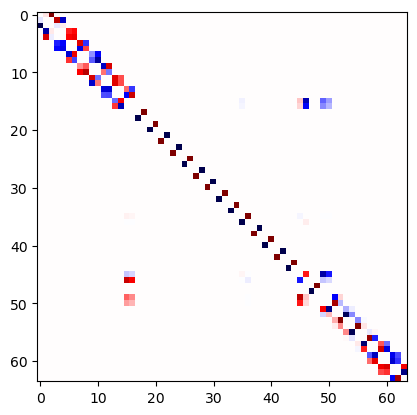

In [543]:
plt.imshow(gtn.C_m_history[-1],cmap='seismic')
# for bdy in [gtn.L//8,gtn.L//8*3,gtn.L//8*5,gtn.L//8*7]:
#     plt.axvline(x=bdy*2,ls='dashed')
#     plt.axhline(y=bdy*2,ls='dashed')

In [20]:
for i in range(0,gtn.L-1,2):
    gtn.measure([P['+']], [i,i+1])
for i in range(gtn.L+2,gtn.L*2,2)[::-1]:
    gtn.measure([P['+']], [i,i+1])



In [ ]:
see how about create, squeeze, then move to flip a sign and squeeze

In [544]:
gtn.C_m_history[-1][gtn.L,gtn.L+1]

0.0

In [16]:
G1=gtn.C_m_history[-1]

In [22]:
G2=gtn.C_m_history[-1]

In [33]:
fidelity(gtn.C_m_history[0],gtn.C_m_history[-1])

1.0000000000000497

In [34]:
fidelity(gtn.C_m_history[-1],gtn.C_m_history[0])

1.0000000000000497

In [ ]:
fidelity()

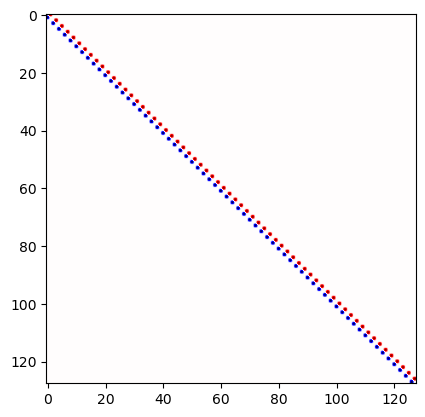

In [112]:
plt.imshow(gtn.C_m_history[-1],cmap='seismic')

In [83]:
gtn.mutual_information_m(np.arange(gtn.L//2), np.arange(gtn.L//2,gtn.L))/np.log(2)

2.001653400119959

In [90]:
gtn.mutual_information_m(np.arange(gtn.L//4), np.arange(gtn.L//4,gtn.L))/np.log(2)

1.0106432863800476

In [98]:
MI=[gtn.mutual_information_m(np.arange(x), np.arange(x,gtn.L))/np.log(2) for x in range(1,gtn.L-1)]

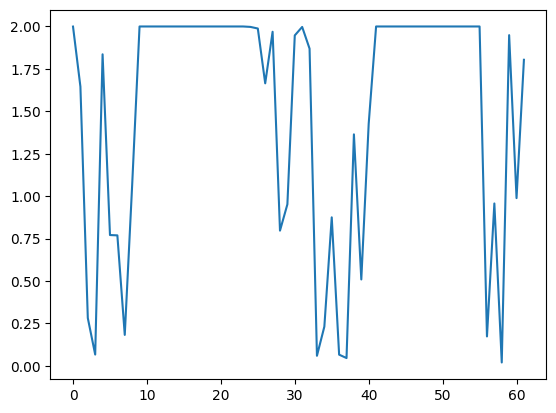

In [99]:
plt.plot(MI)

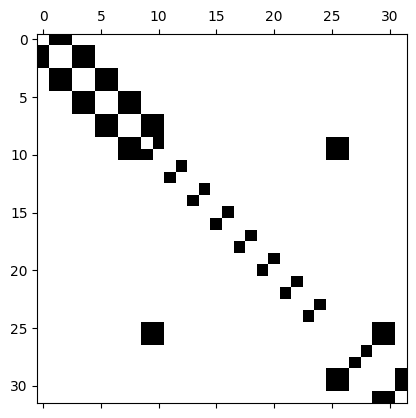

In [33]:
plt.spy(gtn.C_m_history[-1])

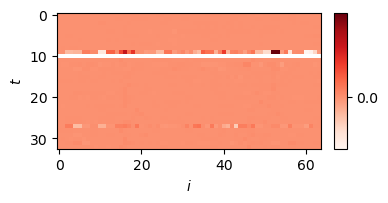

In [549]:
fig,ax=plt.subplots(figsize=(3.4,3.4/1.6))
im=ax.imshow(EC.mean(axis=0)/np.log(2),cmap='Reds')
axins=ax.inset_axes([1.05, 0, 0.05, 1],transform=ax.transAxes)
# ax.imshow(np.array([ec/nla.norm(ec) for ec in EC[0]]),cmap='Reds')
ax.set_ylabel('$t$')
ax.set_xlabel('$i$')
# ax.set_ylim([20,0])
plt.colorbar(im,cax=axins,ticks=[0,.5])
# fig.savefig('EC_p_0.8_k_2.pdf')

In [212]:
gtn.mutual_information_m(np.arange(gtn.L//2), gtn.L//2+np.arange(gtn.L//2))/np.log(2)

1.0414638538766658

In [213]:
gtn.mutual_information_m(np.arange(gtn.L//8), np.arange(gtn.L//8,gtn.L))/np.log(2)

2.0000000000004325

In [214]:
gtn.mutual_information_m(np.arange(gtn.L//4), np.arange(gtn.L//4,gtn.L//2))/np.log(2)

2.0000000000001625

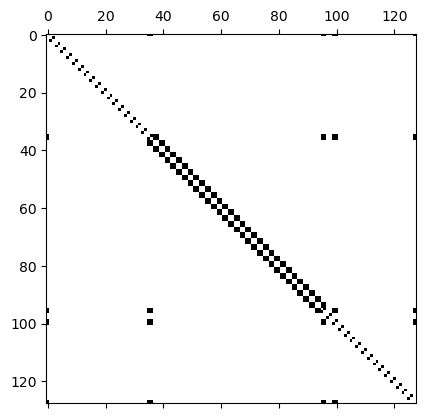

In [215]:
plt.spy(gtn.C_m_history[-1])

In [ ]:
?? Why open chain not show correct entanglement?

In [30]:
gtn.mutual_information_m(np.arange(gtn.L), np.arange(gtn.L)+gtn.L)/np.log(2)

3.966932252807668

(0.0, 1.0)

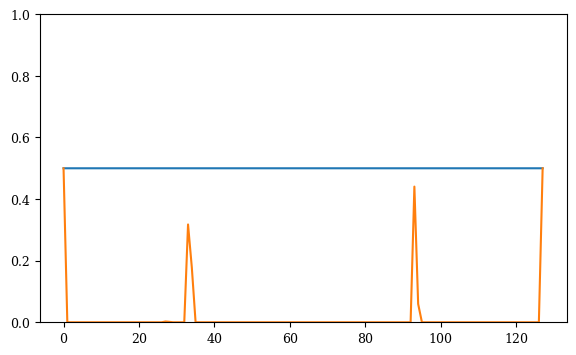

In [118]:
fig,ax=plt.subplots()
ax.plot(EC[0,0]/np.log(2))
# ax.plot(EC[0,1]/np.log(2))
ax.plot(EC[0,20]/np.log(2))
ax.set_ylim([0,1])

(0.0, 1.0)

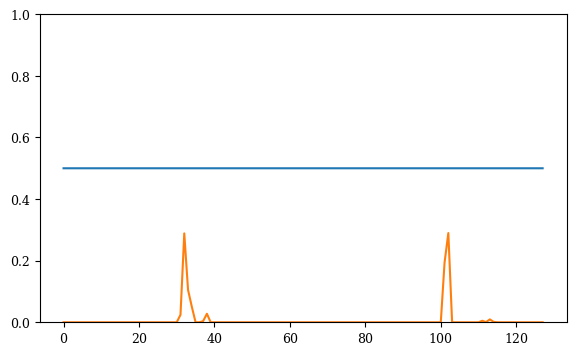

In [109]:
fig,ax=plt.subplots()
ax.plot(EC[0,0]/np.log(2))
# ax.plot(EC[0,1]/np.log(2))
ax.plot(EC[0,20]/np.log(2))
ax.set_ylim([0,1])

In [53]:
EC[0,0].sum()/np.log(2)

63.99999999999999

In [103]:
EC[0,-1].sum()/np.log(2)

0.999999999146669

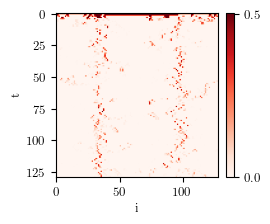

In [ ]:
fig,ax=plt.subplots(figsize=(3.4,3.4/1.6))
im=ax.imshow(EC.mean(axis=0)/np.log(2),cmap='Reds')
axins=ax.inset_axes([1.05, 0, 0.05, 1],transform=ax.transAxes)
# ax.imshow(np.array([ec/nla.norm(ec) for ec in EC[0]]),cmap='Reds')
ax.set_ylabel('t')
ax.set_xlabel('i')
plt.colorbar(im,cax=axins,ticks=[0,.5])
# fig.savefig('EC_p_0.8_k_2.pdf')

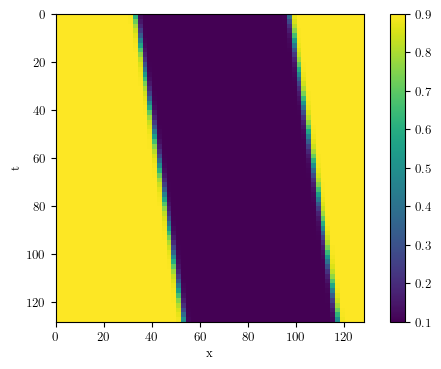

In [ ]:
plt.imshow(np.vstack(gtn.p_history[::2]),extent=[0,128,128,0])
plt.ylabel('t')
plt.xlabel('x')
plt.colorbar()

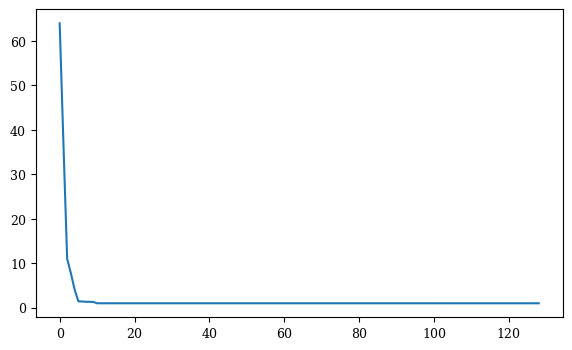

In [58]:
plt.plot(EC[0].sum(axis=-1)/np.log(2))

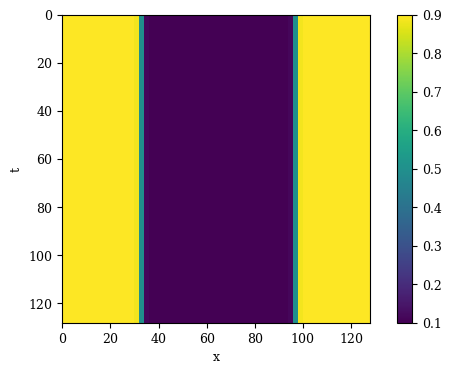

In [39]:
plt.imshow(np.vstack(gtn.p_history[::2]),extent=[0,128,128,0])
plt.ylabel('t')
plt.xlabel('x')
plt.colorbar()

# Braid

In [279]:
class Braiding:

    def __init__(self, L, p, left_pos=None, right_pos=None,k=1,):
        '''p should > 0.5 in order to initialize a "trivial-topological-trivial" junction '''
        self.L = L
        self.p = p
        self.site_lists = []
        self.p_lists = []
        self.step_number= []
        self.left_pos = L // 4 if left_pos is None else left_pos
        self.right_pos = 3 * L // 4 if right_pos is None else right_pos
        self.k=k
        self.initialize_index()

    def initialize_index(self,k=None):
        '''pbp: stands for p (1-p) p, where b is p *inverse*'''
        if k is not None:
            k0=self.k
            self.k=k

        i_list = np.arange(0, 2 * self.L, 2)

        self.site_0_list = [[[leg * 2 * self.L + i, leg * 2 * self.L + i + 1]
                             for i in i_list] for leg in range(3)]
        self.site_1_list = [[[
            leg * 2 * self.L + i + 1, leg * 2 * self.L + i + 2
        ] for i in i_list[:-1]] for leg in range(3)]
        self.p_pbp = list(
            interpolation(x1=self.left_pos,
                          x2=self.right_pos,
                          l0=self.p,
                          h0=1 - self.p,
                          L=self.L,
                          k=self.k))
        self.p_bpb = list(
            interpolation(x1=self.left_pos,
                          x2=self.right_pos,
                          l0=1 - self.p,
                          h0=self.p,
                          L=self.L - 1,
                          k=self.k))
        self.p_pb = list(interpolation(x1=self.left_pos, x2=self.L+2, l0=self.p, h0=1-self.p, L=self.L,k=self.k))
        self.p_bp = list(interpolation(x1=self.left_pos, x2=self.L+2, l0=1-self.p, h0=self.p, L=self.L-1,k=self.k))
        self.p_p = [self.p] * self.L
        self.p_b = [1 - self.p] * (self.L - 1)
        self.outer = {leg: (leg) * 2 * self.L for leg in range(3)}
        self.inner = {leg: (1 + leg) * 2 * self.L - 1 for leg in range(3)}

        if k is not None:
            self.k=k0



    def initialization(self, time=5,k=None):
        if k is not None:
            self.initialize_index(k=k)
        
        p_0_list = self.p_pbp + self.p_pbp + self.p_p
        p_1_list = self.p_bpb + self.p_bpb + self.p_b
        site_0_list_all = sum(self.site_0_list, [])
        site_1_list_all = sum(self.site_1_list, [])
        site_list = [site_0_list_all, site_1_list_all] * time
        p_list = [p_0_list, p_1_list] * time
        self.initialize_index(k=self.k)
        return site_list, p_list

    def initialization_op(self, time=5):
        p_0_list=self.p_pb+self.p_pb+self.p_p 
        p_1_list=self.p_bp+self.p_bp+self.p_b + [self.p]
        site_0_list_all = sum(self.site_0_list, [])
        site_1_list_all = sum(self.site_1_list, []) + [[self.inner[0],self.inner[1]]]
        site_list = [site_0_list_all, site_1_list_all] * time
        p_list = [p_0_list, p_1_list] * time
        return site_list, p_list

    def shift_DW(self, leg, start, end, time=10, drop_0=None, drop_1=None):
        '''
        time: total time step of shifting of domain wall from `start` to `end`
        leg: which leg is operate
        start: [left, right] the position of left and right domain wall in the starting stage
        end: [left, right] the position of left and right domain wall in the final stage
        drop_0: [left, right] drop idx<=left and idx>=right for 0-indexed
        drop_1: [left, right] drop idx<=left and idx>=right for 1-indexed
        The evolution trajectory is the interpolation between the start and end.
        '''
        assert leg in range(3), f'leg number {leg} should be 0,1,2'
        if drop_0 is None:
            drop_0 = [-1, self.L]
        if drop_1 is None:
            drop_1 = [-1, self.L - 1]

        # start_left_pos,start_right_pos=start, start
        # end_left_pos, end_right_pos=end,end
        intermediate_pos = np.linspace(start, end, time).tolist()
        # intermediate_1_pos=np.linspace(start,end,time).tolist()
        p_list = []
        for intermediate in intermediate_pos:
            p_list.append(
                interpolation(x1=intermediate[0],
                              x2=intermediate[1],
                              l0=self.p,
                              h0=1 - self.p,
                              L=self.L,
                              k=self.k)[drop_0[0] + 1:drop_0[1]])
            p_list.append(
                interpolation(x1=intermediate[0],
                              x2=intermediate[1],
                              l0=1 - self.p,
                              h0=self.p,
                              L=self.L - 1,
                              k=self.k)[drop_1[0] + 1:drop_1[1]])

        site_list = [
            self.site_0_list[leg][drop_0[0] + 1:drop_0[1]],
            self.site_1_list[leg][drop_1[0] + 1:drop_1[1]]
        ] * time

        return site_list, p_list

    def link(self, left, right, time=4):

        site_list = [[[self.inner[left], self.inner[right]]]] * time
        p_list = [[self.p]] * time
        return site_list, p_list

    def pipeline(self, steps):
        step_number=0
        for step_number,(step, kwargs) in enumerate(steps):
            site_list, p_list = step(**kwargs)
            self.site_lists += site_list
            self.p_lists += p_list
            self.step_number+=[step_number]*len(site_list)
            


## computational only

In [280]:
L=64
gtn=GTN(L=L,seed=0+1,history=True,op=False,trijunction=True,random_init=False)

In [296]:
braiding=Braiding(L=gtn.L, p=1,k=10000,left_pos=gtn.L//4-0.01,right_pos=3*gtn.L//4-0.01)

In [311]:
braiding.pipeline(
    [
    (braiding.initialization,dict(time=5,k=1)),
    (braiding.shift_DW,dict(leg=0, start=[braiding.left_pos,braiding.right_pos], end=[braiding.left_pos,braiding.L+1])),
    (braiding.link,dict(left=0,right=2,)),
    (braiding.shift_DW,dict(leg=2, start=[braiding.L,braiding.L+1], end=[braiding.right_pos,braiding.L+1],drop_0=[-1,-1])),
    (braiding.shift_DW,dict(leg=1, start=[braiding.left_pos,braiding.right_pos], end=[braiding.left_pos,braiding.L+1])),
    (braiding.link,dict(left=1,right=2,)),
    (braiding.shift_DW,dict(leg=0, start=[braiding.left_pos,braiding.L+2], end=[braiding.left_pos,braiding.right_pos],)),
    (braiding.shift_DW,dict(leg=2, start=[braiding.right_pos,braiding.L+1], end=[braiding.L+1,braiding.L+2],)),
    (braiding.shift_DW,dict(leg=1, start=[braiding.left_pos,braiding.L+2], end=[braiding.left_pos,braiding.right_pos]))
    ])

(0.0, 384.0)

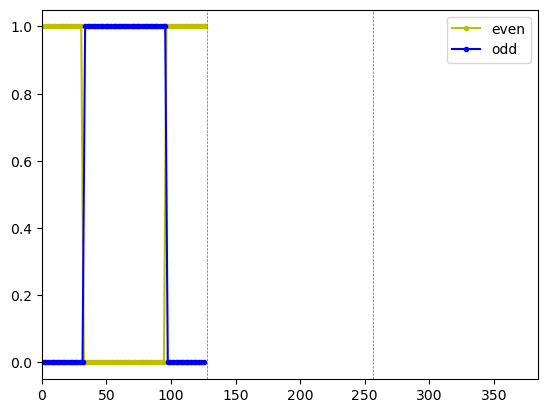

In [313]:
idx=10
fig,ax=plt.subplots()
ax.plot(np.array(braiding.site_lists[2*idx]).mean(axis=1),braiding.p_lists[2*idx],'.-',label='even',color='y')
ax.plot(np.array(braiding.site_lists[2*idx+1]).mean(axis=1),braiding.p_lists[2*idx+1],'.-',label='odd',color='b')
ax.axvline(x=braiding.L*2,ls='dashed',lw=0.5)
ax.axvline(x=braiding.L*4,ls='dashed',lw=0.5)
ax.legend()
ax.set_xlim([0,6*braiding.L])

In [259]:
mini=100
for ll in braiding.p_lists:
    mini=min(mini,np.abs(np.array(ll)-0.5).min())

In [260]:
mini

0.5

0it [00:00, ?it/s]

192it [00:00, 442.57it/s]
189it [00:00, 445.78it/s]


(30.0, 36.0)

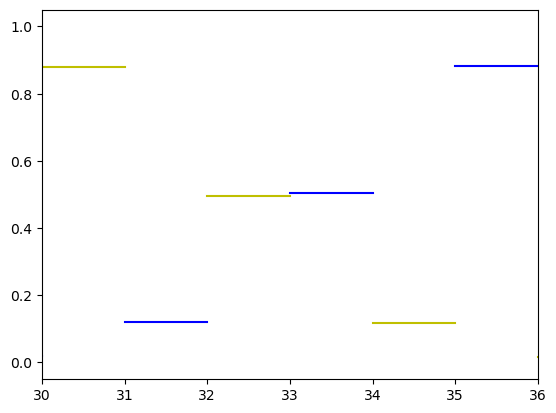

In [314]:
idx=5
fig,ax=plt.subplots()
for (i,j),p in tqdm(zip(braiding.site_lists[2*idx],braiding.p_lists[2*idx])):
    ax.plot([i,j],[p,p],color='y')
for (i,j),p in tqdm(zip(braiding.site_lists[2*idx+1],braiding.p_lists[2*idx+1])):
    ax.plot([i,j],[p,p],color='b')
ax.axvline(x=braiding.L*2,ls='dashed',lw=0.5)
ax.axvline(x=braiding.L*4,ls='dashed',lw=0.5)
# ax.legend()
ax.set_xlim([braiding.L//2-2,braiding.L//2+4])
# ax.set_xlim([braiding.L//2*3-2,braiding.L//2*3+4])

In [315]:
L=64
# iteration=np.arange(L)
# iteration=np.arange(12)
# MI=np.zeros((iteration.shape[0],))
# EC=np.zeros((2*iteration.shape[0]+1,2*L))
# EE=np.zeros((iteration.shape[0],L//2-1))
# SL2=np.zeros((ensemble_size,iteration.shape[0]))
# p=.1
# v=0
gtn=GTN(L=L,seed=1,history=True,op=False,trijunction=True,random_init=False)
# EC[ensemble,0]=gtn.entanglement_contour(L+np.arange(gtn.L))
MI=[]
# for site_list,p_list in tqdm(zip(site_lists,p_lists)):
for site_list,p_list in tqdm(zip(braiding.site_lists,braiding.p_lists)):
    gtn.measure_list_tri_op(site_list, p_list)
    MI.append([gtn.mutual_information_m(leg*gtn.L+np.arange(gtn.L), (leg+1)%3*gtn.L+np.arange(gtn.L))/np.log(2) for leg in range(3)])
    

0it [00:00, ?it/s]

148it [16:51,  6.83s/it]


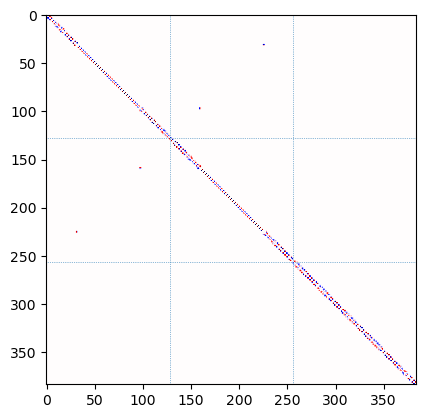

In [316]:
plt.imshow(gtn.C_m_history[-1],cmap='seismic')
for bdy in [gtn.L,gtn.L*2,]:
    plt.axvline(x=bdy*2,ls='dotted',lw=0.5)
    plt.axhline(y=bdy*2,ls='dotted',lw=0.5)
# plt.xlim(gtn.L+2*gtn.L,2*gtn.L+2*gtn.L)
# plt.ylim(gtn.L+2*gtn.L,0+2*gtn.L)

In [307]:
for i in range(0,gtn.L-1,2):
    gtn.measure([P['+']], [2*gtn.L+i,2*gtn.L+i+1])
for i in range(gtn.L+2,gtn.L*2,2)[::-1]:
    gtn.measure([P['+']], [2*gtn.L+i,2*gtn.L+i+1])


In [309]:
gtn.C_m_history[-1][2*gtn.L+gtn.L,2*gtn.L+gtn.L+1]

0.9999999999996234

In [ ]:
GG_0=gtn.C_m_history[-1]

-0.6374158899475011

In [192]:
for i in range(0,gtn.L-1,2):
    gtn.measure([P['+']], [i,i+1])
for i in range(gtn.L+2,gtn.L*2,2)[::-1]:
    gtn.measure([P['+']], [i,i+1])



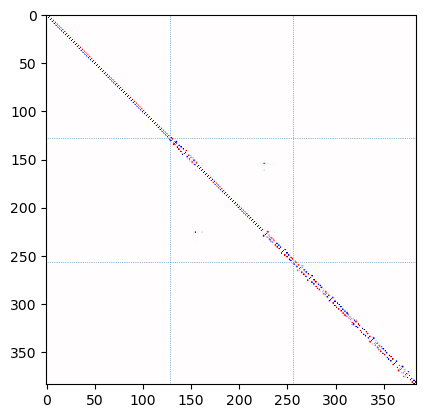

In [193]:
plt.imshow(gtn.C_m_history[-1],cmap='seismic')
for bdy in [gtn.L,gtn.L*2,]:
    plt.axvline(x=bdy*2,ls='dotted',lw=0.5)
    plt.axhline(y=bdy*2,ls='dotted',lw=0.5)

In [194]:
gtn.C_m_history[-1][gtn.L,gtn.L+1]

0.9999999999988686

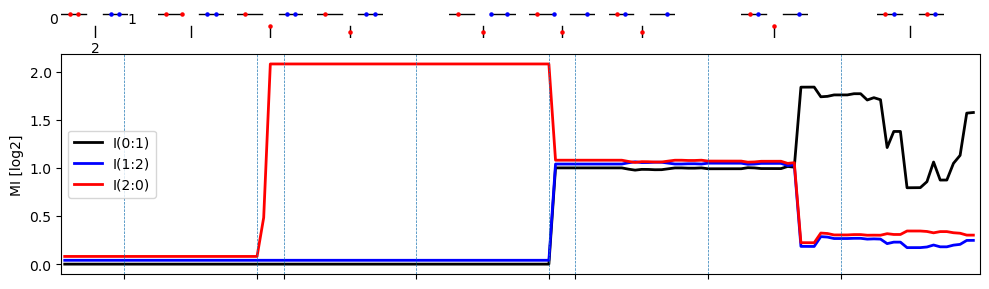

In [118]:
fig,ax=plt.subplots(figsize=(10,3),tight_layout=True)
color_list='kbr'
for idx,color in zip(range(3),color_list):
    ax.plot(np.array(MI)[:,idx]+idx*0.04,label=f'I({idx}:{(idx+1)%3})',lw=2,color=color)
ax.legend(loc=6)
steps=np.where(np.diff(braiding.step_number)==1)[0]
for x in (steps):
    ax.axvline(x=x,ls='dashed',lw=0.5)
ax.set_xlim(-0.5,(len(MI)))

ax_inset=[ax.inset_axes([x-5,2.35,10,.3],transform=ax.transData) for x in (np.r_[0,steps]+np.r_[steps,len(MI)])/2]
plot_trijunction(x1=[-1.5,-1], x2=[1,1.5], y1=[0,0], y2=[0,0],ax=ax_inset[0])
plot_trijunction(x1=[-1.5,-0.5], x2=[1,1.5], y1=[0,0], y2=[0,0],ax=ax_inset[1])
plot_trijunction(x1=[-1.5,0], x2=[1,1.5], y1=[0,-0.5], y2=[0,0],ax=ax_inset[2])
plot_trijunction(x1=[-1.5,0], x2=[1,1.5], y1=[0,-.75], y2=[0,0],ax=ax_inset[3])
plot_trijunction(x1=[-1.5,0], x2=[.5,1.5], y1=[0,-.75], y2=[0,0],ax=ax_inset[4])
plot_trijunction(x1=[-1.5,0], x2=[-.5,1.5], y1=[0,-.75], y2=[0,0],ax=ax_inset[5])

plot_trijunction(x1=[-1.5,0], x2=[-1,1.5], y1=[0,-.75], y2=[0,0],ax=ax_inset[6])
plot_trijunction(x1=[-1.5,0], x2=[-1,1.5], y1=[0,-.5], y2=[0,0],ax=ax_inset[7])
plot_trijunction(x1=[-1.5,1], x2=[-1,1.5], y1=[0,0], y2=[0,0],ax=ax_inset[8])

ax.text(-2.4,2.5,'0',transform=ax.transData)
ax.text(9.5,2.5,'1',transform=ax.transData)
ax.text(4,2.2,'2',transform=ax.transData)
ax.set_xticks(steps)
ax.set_xticklabels([])
ax.set_ylabel('MI [log2]')

fig.savefig('trijunction_1_p0.7.pdf')

In [75]:
def plot_trijunction(x1,x2,y1,y2,ax=None,s=5):
    if ax is None:
        fig,ax=plt.subplots()
    ax.plot([0.5,2],[0,0],color='k',lw=1)
    ax.plot([-0.5,-2],[0,0],color='k',lw=1)
    ax.plot([0,0],[-0.5,-1],color='k',lw=1)
    ax.scatter(x1,y1,color='r',zorder=10,s=s)
    ax.scatter(x2,y2,color='b',zorder=10,s=s)
    ax.set_xlim([-2,2])
    ax.set_ylim([-1,0.2])
    ax.set_axis_off()

In [ ]:
plot_trijunction(x1=[-1.5,-1], x2=[1,1.5], y1=[0,0], y2=[0,0],)

In [255]:
gtn.mutual_information_m(gtn.L+np.arange(gtn.L//2), gtn.L+np.arange(gtn.L//2,gtn.L))/np.log(2)

2.000000000000051

In [256]:
gtn.mutual_information_m(2*gtn.L+np.arange(gtn.L//2), 2*gtn.L+np.arange(gtn.L//2,gtn.L))/np.log(2)

0.013808613202513934

## Reference + computational

In [537]:
L=16
gtn=GTN(L=L,seed=0+1,history=True,op=True,trijunction=True,random_init=False)

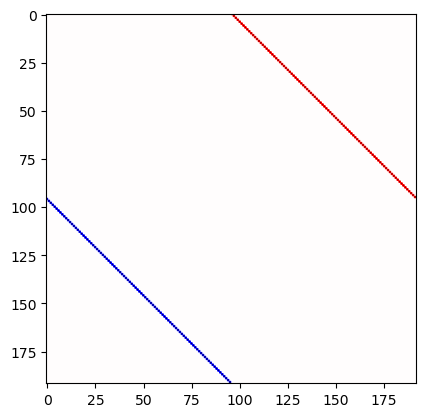

In [538]:
plt.imshow(gtn.C_m_history[-1],cmap='seismic')

In [165]:
braiding=Braiding(L=gtn.L, p=0.7,left_pos=gtn.L//2,k=2)

In [166]:
braiding.pipeline(
    [
    (braiding.initialization_op,dict(time=5)),
    (braiding.shift_DW,dict(leg=0, start=[braiding.left_pos,braiding.L+2], end=[braiding.L+1,braiding.L+2])),
    (braiding.link,dict(left=1,right=2,)),
    (braiding.shift_DW,dict(leg=2, start=[braiding.L,braiding.L+1], end=[braiding.left_pos,braiding.L+1],drop_0=[-1,-1])),
    (braiding.shift_DW,dict(leg=1, start=[braiding.left_pos,braiding.L+2], end=[braiding.L+1,braiding.L+2])),
    (braiding.link,dict(left=0,right=2,)),
    (braiding.shift_DW,dict(leg=0, start=[braiding.L+1,braiding.L+2], end=[braiding.left_pos,braiding.L+2],drop_0=[-1,-1])),
    (braiding.shift_DW,dict(leg=2, start=[braiding.left_pos,braiding.L+2], end=[braiding.L+1,braiding.L+2],)),
    (braiding.link,dict(left=0,right=1,)),
    (braiding.shift_DW,dict(leg=1, start=[braiding.L+1,braiding.L+2], end=[braiding.left_pos,braiding.L+2],drop_0=[-1,-1]))
    ])

(0.0, 96.0)

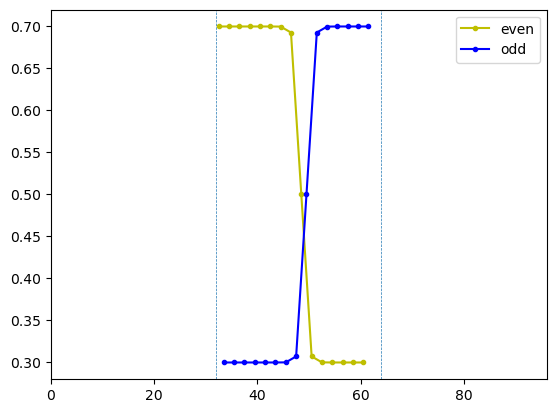

In [167]:
idx=70
fig,ax=plt.subplots()
ax.plot(np.array(braiding.site_lists[2*idx]).mean(axis=1),braiding.p_lists[2*idx],'.-',label='even',color='y')
ax.plot(np.array(braiding.site_lists[2*idx+1]).mean(axis=1),braiding.p_lists[2*idx+1],'.-',label='odd',color='b')
ax.axvline(x=braiding.L*2,ls='dashed',lw=0.5)
ax.axvline(x=braiding.L*4,ls='dashed',lw=0.5)
ax.legend()
ax.set_xlim([0,braiding.L*6])

In [168]:
L=16
gtn=GTN(L=L,seed=0+1,history=True,op=True,trijunction=True,random_init=False)
MI=[]
EC=[gtn.entanglement_contour(np.arange(gtn.L*3))]
EC_2=[gtn.entanglement_contour(np.arange(gtn.L*3))]
for site_list,p_list in tqdm(zip(braiding.site_lists,braiding.p_lists)):
    gtn.measure_list_tri_op(site_list, p_list)
    MI.append([gtn.mutual_information_m(leg*gtn.L+np.arange(gtn.L), (leg+1)%3*gtn.L+(gtn.L)*3+np.arange(gtn.L))/np.log(2) for leg in range(3)])
    EC.append(gtn.entanglement_contour(np.arange(gtn.L*3)))
    EC_2.append(gtn.entanglement_contour(gtn.L*3+np.arange(gtn.L*3)))
    

0it [00:00, ?it/s]

142it [00:11, 12.32it/s]


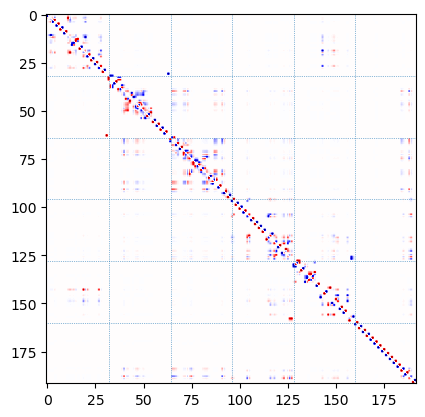

In [169]:
plt.imshow(gtn.C_m_history[-1],cmap='seismic')
for bdy in [gtn.L,gtn.L*2,gtn.L*3,gtn.L*4,gtn.L*5]:
    plt.axvline(x=bdy*2,ls='dotted',lw=0.5)
    plt.axhline(y=bdy*2,ls='dotted',lw=0.5)

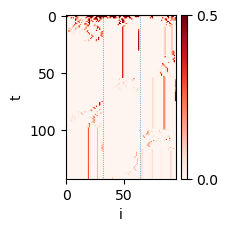

In [170]:
fig,ax=plt.subplots(figsize=(3.4,3.4/1.6))
im=ax.imshow(np.array(EC)/np.log(2),cmap='Reds')
axins=ax.inset_axes([1.05, 0, 0.05, 1],transform=ax.transAxes)
# ax.imshow(np.array([ec/nla.norm(ec) for ec in EC[0]]),cmap='Reds')
ax.set_ylabel('t')
ax.set_xlabel('i')
plt.colorbar(im,cax=axins,ticks=[0,.5])
# fig.savefig('EC_p_0.8_k_2.pdf')

for bdy in [gtn.L,gtn.L*2]:
    plt.axvline(x=bdy*2,ls='dotted',lw=0.5)
    # plt.axhline(y=bdy*2,ls='dotted',lw=0.5)

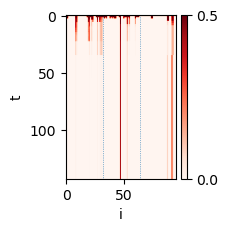

In [171]:
fig,ax=plt.subplots(figsize=(3.4,3.4/1.6))
im=ax.imshow(np.array(EC_2)/np.log(2),cmap='Reds')
axins=ax.inset_axes([1.05, 0, 0.05, 1],transform=ax.transAxes)
ax.set_ylabel('t')
ax.set_xlabel('i')
plt.colorbar(im,cax=axins,ticks=[0,.5])

for bdy in [gtn.L,gtn.L*2]:
    plt.axvline(x=bdy*2,ls='dotted',lw=0.5)
    # plt.axhline(y=bdy*2,ls='dotted',lw=0.5)

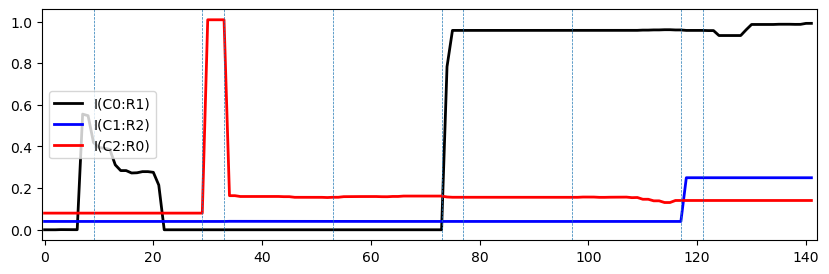

In [172]:
fig,ax=plt.subplots(figsize=(10,3))
color_list='kbr'
for idx,color in zip(range(3),color_list):
    ax.plot(np.array(MI)[:,idx]+idx*0.04,label=f'I(C{idx}:R{(idx+1)%3})',lw=2,color=color)
ax.legend(loc=6)
steps=np.where(np.diff(braiding.step_number)==1)[0]
for x in (steps):
    ax.axvline(x=x,ls='dashed',lw=0.5)
ax.set_xlim(-0.5,(len(MI)))
fig.savefig('trijunction_2_p0.7.pdf')

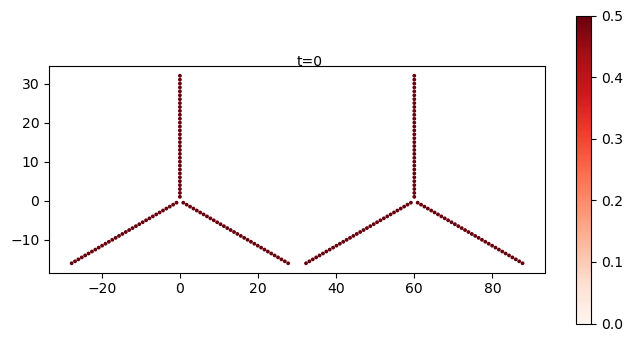

In [173]:
fig,ax=plt.subplots(figsize=(8,4))
r=np.arange(gtn.L*2)[::-1]+1
im=ax.scatter(np.concatenate([r*np.cos(np.deg2rad(theta)) for theta in [210,90,330]]),np.concatenate([r*np.sin(np.deg2rad(theta)) for theta in [210,90,330]]),s=3,c=EC[0]/np.log(2),cmap='Reds',vmin=0,vmax=1/2)

im_2=ax.scatter(60+np.concatenate([r*np.cos(np.deg2rad(theta)) for theta in [210,90,330]]),np.concatenate([r*np.sin(np.deg2rad(theta)) for theta in [210,90,330]]),s=3,c=EC_2[0]/np.log(2),cmap='Reds',vmin=0,vmax=1/2)
plt.colorbar(im)
tt=ax.text(.5,1,f't=0',transform=ax.transAxes)
ax.set_aspect(1)

In [174]:
def animate(i):
    im.set_array(EC[i]/np.log(2))
    im_2.set_array(EC_2[i]/np.log(2))
    tt.set_text(f't={i}')

In [175]:
anim = FuncAnimation(fig, animate, interval=100, frames=len(EC))
anim.save('trijunction_2_p0.7.mp4',dpi=600)

In [130]:
anim.save('trijunction_2_p0.8.gif',dpi=600)

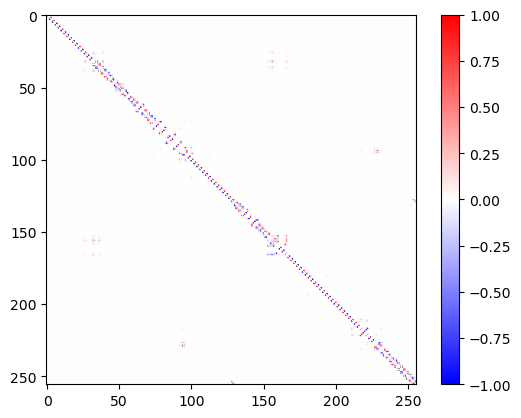

In [56]:
i=-2
fig,ax=plt.subplots()
Gamma=gtn.C_m_history[i+1]
im=ax.imshow(gtn.C_m_history[i+1],cmap='bwr',vmin=-1,vmax=1)
plt.colorbar(im)

# tt=ax.text(0,1.05,'t={:d}: (i,j)=({:d},{:d})   n=({:.2f},{:.2f},{:.2f})   MI={:.2e}   $|\Gamma^2+1|$={:.2e}'.format(i//gtn.L,*gtn.i_history[i],*gtn.n_history[i][0],gtn.MI_history[i],error[i]),transform=ax.transAxes)

## Correlator

In [ ]:
!pip install ipyparallel

In [17]:
# ipcluster start --engines=MPI
from ipyparallel import Client
client = Client()

In [18]:
dview = client[:]

In [19]:
# dview.push({'GTN': GTN}).wait()
dview.execute('import numpy as np').wait()
dview.execute('from tqdm import tqdm').wait()
dview.execute('from GTN import *').wait()


True

In [20]:
L=128
MI=[]
# p=0.9
p_list=np.arange(.7,0.97,.02)
Born=True

In [21]:
def run(inputs):
    L,ensemble,p,Born=inputs
    gtn=GTN(L=L,seed=ensemble,history=False,random_init=False)
    for i in (range(L)):
        gtn.measure_all_tri_op(p_list=p,Born=Born,even=True)
        gtn.measure_all_tri_op(p_list=1-p,Born=Born,even=False)
    return (gtn.C_m_history[-1])

In [14]:
C_m=run((3,0,0.8,True))

In [15]:
np.round(C_m,2)

array([[ 0.  , -0.28,  0.24, -0.91,  0.17,  0.  ],
       [ 0.28,  0.  ,  0.  , -0.11, -0.63,  0.71],
       [-0.24,  0.  ,  0.  , -0.14, -0.75, -0.6 ],
       [ 0.91,  0.11,  0.14,  0.  ,  0.  , -0.36],
       [-0.17,  0.63,  0.75,  0.  ,  0.  ,  0.07],
       [ 0.  , -0.71,  0.6 ,  0.36, -0.07,  0.  ]])

In [22]:
np.prod(C_m[np.arange(0,6,2),(np.arange(0,6,2)+1)%6])

0.002545229756482559

In [12]:
np.prod(C_m[np.arange(0,6,2),(np.arange(0,6,2)+3)%6])

0.3452580640080302

In [23]:
C_m_list=[]
inputs=[(L,ensemble,p,Born) for ensemble in range(500) for p in p_list]
results = dview.map_async(run, inputs)


In [24]:
len(inputs)

1400

In [25]:
results.progress

0

In [26]:
for result in tqdm(results):
    C_m_list.append(result)

  0%|          | 0/1400 [00:00<?, ?it/s]

100%|██████████| 1400/1400 [08:34<00:00,  2.72it/s]  


In [27]:
cc_list=[]
dist_list=np.arange(1,C_m_list[0].shape[0]//2)
for C_m in tqdm(C_m_list):
    cc_list.append(np.array([C_m[[x for x in range(C_m.shape[0])],[(x+dist)%(C_m.shape[0]) for x in range(C_m.shape[0])]] for dist in dist_list]))

# cc_r=np.mean(np.abs(cc_list),axis=(0,2))

  0%|          | 7/1400 [00:00<00:20, 66.91it/s]

100%|██████████| 1400/1400 [00:16<00:00, 84.03it/s]


In [28]:
cc_list=np.array(cc_list)
cc_list=(cc_list).reshape((100,p_list.shape[0],*cc_list.shape[1:]))
cc_r=np.abs(cc_list).mean(axis=(0,3))


In [29]:
idx_list=range(cc_r.shape[0])
xi_list=[]
for idx in idx_list:
    lr_rs=scipy.stats.linregress((dist_list),np.log(cc_r[idx]))
    xi_list.append(-1/lr_rs.slope)


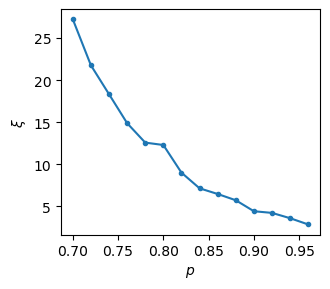

In [35]:
fig,ax=plt.subplots(figsize=(3.4,3),tight_layout=True)
ax.plot(p_list[idx_list],xi_list,'.-')
ax.set_xlabel('$p$')
ax.set_ylabel(r'$\xi$')
fig.savefig('cor_len.pdf')

In [ ]:
p_list[3]

0.76

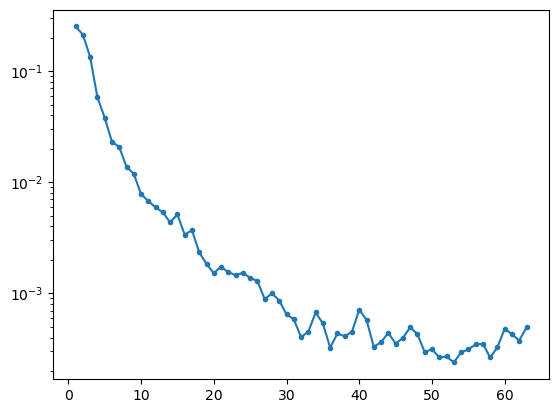

In [ ]:
fig,ax=plt.subplots()
ax.plot(dist_list,cc_r[3],'.-')
# ax.set_xscale('log')
ax.set_yscale('log')

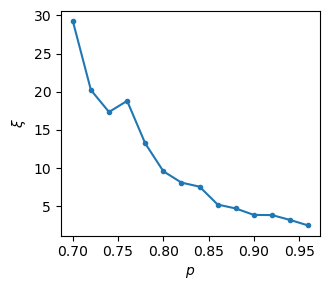

In [ ]:
fig,ax=plt.subplots(figsize=(3.4,3),tight_layout=True)
ax.plot(p_list[idx_list],xi_list,'.-')
ax.set_xlabel('$p$')
ax.set_ylabel(r'$\xi$')
fig.savefig('cor_len.pdf')

In [ ]:
lr_rs=scipy.stats.linregress(np.log(dist_list),np.log(cc_r[-1]))

In [ ]:
lr_rs

LinregressResult(slope=-9.247604871129903, intercept=15.860403889287102, rvalue=-0.8989131300306571, pvalue=1.2533735270373566e-46, stderr=0.40314052582834786, intercept_stderr=1.605208822345843)

In [894]:
def animate(i):
    print(i)
    im.set_array(gtn.C_m_history[i+1])
    tt.set_text('t={:d}: (i,j)=({:d},{:d})   n=({:.2f},{:.2f},{:.2f})   MI={:.2e}   $|\Gamma^2+1|$={:.2e}'.format(i//gtn.L,*gtn.i_history[i],*gtn.n_history[i][0],gtn.MI_history[i],error[i]))

In [ ]:
anim = FuncAnimation(fig, animate, interval=100, frames=len(gtn.i_history))
anim.save('colormap_critical.mp4',dpi=600)

# Class A Computational + Reference

In [651]:
gtn=GTN(L=64,seed=0,op=True,random_init=False)
sites_flip=np.sort(gtn.rng.choice(np.arange(2*gtn.L),size=gtn.L,replace=False))
gtn.set(ij_list=np.array([[site,site+gtn.L*2] for site in sites_flip]),n_list=[-1]*gtn.L)


In [652]:
A=0.01 # controls how quantized is the entanglement
k=1 # determines the variance of <gamma_i>

# r=0.99


In [653]:
# def generate_drift_dw(v=1,idx=0,k=1):
    # return interpolation((gtn.L//2//4+v*idx),(gtn.L//2//4*3+v*idx),0,1,gtn.L//2,k=k)
def generate_drift_dw(v1=1,v2=1,idx=0,k=1,z=[0,1]):
    if (gtn.L//2//4+v1*idx)<(gtn.L//2//4*3+v2*idx):
        return interpolation((gtn.L//2//4+v1*idx),(gtn.L//2//4*3+v2*idx),z[0],z[1],gtn.L//2,k=k)
    else:
        return interpolation((gtn.L//2//4+v1*idx),(gtn.L//2//4+v1*idx),z[0],z[1],gtn.L//2,k=k)


def generate_drift_dw2(v1=1,v2=1,idx=0,k=1,z=[1,1,-2]):
    # if (gtn.L//2//4+v1*idx)<(gtn.L//2//4*3+v2*idx):
    return interpolation2([(gtn.L//2//4+v1*idx),(gtn.L//2//4*2+v2*idx),(gtn.L//2//4*3)],z,gtn.L//2,k=k,)
    # else:
    #     return interpolation2([(gtn.L//2//4+v1*idx),(gtn.L//2//4+v1*idx),(gtn.L//2//4*3)],z,gtn.L//2,k=k,)

In [654]:
t=gtn.L
EC_list=np.zeros((t+1,2*gtn.L))
EE_list=np.zeros((t+1,))
r_map=np.zeros((t,gtn.L//2))
EC_list[0]=gtn.entanglement_contour(gtn.L+np.arange(gtn.L))
# EE_list[0]=gtn.von_Neumann_entropy_m(gtn.L+np.arange(gtn.L))
for i in tqdm(range(t)):
    r_list=generate_drift_2dw(v1=16/gtn.L,v2=-16/gtn.L,idx=i,k=2)
    # r_list=generate_drift_dw2(v1=10/gtn.L,v2=-10/gtn.L,k=1,idx=i)
    
    gtn.measure_all_class_AIII_r(A_list=A,r_list=r_list,Born=True,class_A=True,intraleg=True,)
    gtn.measure_all_class_AIII_r(A_list=np.sqrt(1-A**2),r_list=r_list,Born=True,class_A=True,intraleg=False,)
    r_map[i]=(r_list)
    EC_list[i+1]=gtn.entanglement_contour(np.arange(gtn.L))
    # EE_list[i+1]=gtn.von_Neumann_entropy_m(gtn.L+np.arange(gtn.L))

100%|██████████| 64/64 [00:05<00:00, 10.91it/s]


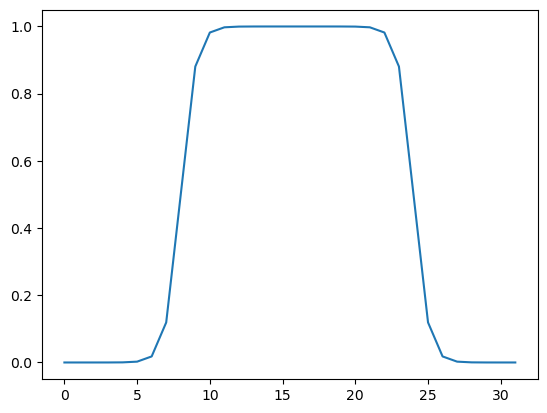

In [658]:
plt.plot(generate_drift_2dw(v1=16/gtn.L,v2=-16/gtn.L,idx=0,k=2))

## DW - anti DW collide

In [687]:

def generate_drift_2dw(v1=1,v2=1,idx=0,k=1,z=[0,1]):
    if (gtn.L//2//4+v1*idx)< (gtn.L//2//4*3+v2*idx):
        offset=-1
    else:
        offset=1
    return interpolation2([(gtn.L//2//4+v1*idx),(gtn.L//2//4*3+v2*idx),],[1,-1],gtn.L//2,k=1,)+offset

In [724]:
def run_dw_anti():
    gtn=GTN(L=64,seed=0,op=True,random_init=False)
    sites_flip=np.sort(gtn.rng.choice(np.arange(2*gtn.L),size=gtn.L,replace=False))
    gtn.set(ij_list=np.array([[site,site+gtn.L*2] for site in sites_flip]),n_list=[-1]*gtn.L)
    t=gtn.L
    EC_list=np.zeros((t+1,2*gtn.L))
    EC_sys_list=np.zeros((t+1,2*gtn.L))
    EC_ref_list=np.zeros((t+1,2*gtn.L))
    # EE_list=np.zeros((t+1,))
    r_map=np.zeros((t,gtn.L//2))
    EC_list[0]=gtn.entanglement_contour(np.arange(gtn.L))
    # EC_sys_list[0,:gtn.L]=gtn.entanglement_contour(np.arange(gtn.L//2))
    # EC_sys_list[0,gtn.L:]=gtn.entanglement_contour(np.arange(gtn.L//2))
    EC_sys_list[0,:gtn.L]=gtn.entanglement_contour(np.r_[np.arange(gtn.L//2),gtn.L+np.arange(gtn.L//2)])[:gtn.L]

    EC_left_half=gtn.entanglement_contour(gtn.L//2+np.r_[np.arange(gtn.L//2),gtn.L+np.arange(gtn.L//2)])
    EC_right_half=gtn.entanglement_contour(np.r_[np.arange(gtn.L//2),gtn.L+np.arange(gtn.L//2)])
    EC_sys_list[0,gtn.L:]=EC_left_half[:gtn.L]
    EC_sys_list[0,:gtn.L]=EC_right_half[:gtn.L]
    EC_ref_list[0,gtn.L:]=EC_left_half[gtn.L:]
    EC_ref_list[0,:gtn.L]=EC_right_half[gtn.L:]
    
    # EE_list[0]=gtn.von_Neumann_entropy_m(gtn.L+np.arange(gtn.L))
    for i in tqdm(range(t)):
        r_list=generate_drift_2dw(v1=16/gtn.L,v2=-16/gtn.L,idx=i,k=2)
        # r_list=generate_drift_dw2(v1=10/gtn.L,v2=-10/gtn.L,k=1,idx=i)
        
        gtn.measure_all_class_AIII_r(A_list=A,r_list=r_list,Born=True,class_A=True,intraleg=True,)
        gtn.measure_all_class_AIII_r(A_list=np.sqrt(1-A**2),r_list=r_list,Born=True,class_A=True,intraleg=False,)
        r_map[i]=(r_list)
        EC_list[i+1]=gtn.entanglement_contour(np.arange(gtn.L))
        # EC_sys_list[i+1,:gtn.L]=gtn.entanglement_contour(np.arange(gtn.L//2))
        # EC_sys_list[i+1,gtn.L:]=gtn.entanglement_contour(np.arange(gtn.L//2)+gtn.L//2)
        EC_left_half=gtn.entanglement_contour(gtn.L//2+np.r_[np.arange(gtn.L//2),gtn.L+np.arange(gtn.L//2)])
        EC_right_half=gtn.entanglement_contour(np.r_[np.arange(gtn.L//2),gtn.L+np.arange(gtn.L//2)])
        EC_sys_list[i+1,gtn.L:]=EC_left_half[:gtn.L]
        EC_sys_list[i+1,:gtn.L]=EC_right_half[:gtn.L]
        EC_ref_list[i+1,gtn.L:]=EC_left_half[gtn.L:]
        EC_ref_list[i+1,:gtn.L]=EC_right_half[gtn.L:]


        # EE_list[i+1]=gtn.von_Neumann_entropy_m(gtn.L+np.arange(gtn.L))
    return r_map,EC_list,EC_sys_list,EC_ref_list

In [725]:
r_map,EC_list,EC_sys_list,EC_ref_list = run_dw_anti()

100%|██████████| 64/64 [00:13<00:00,  4.88it/s]


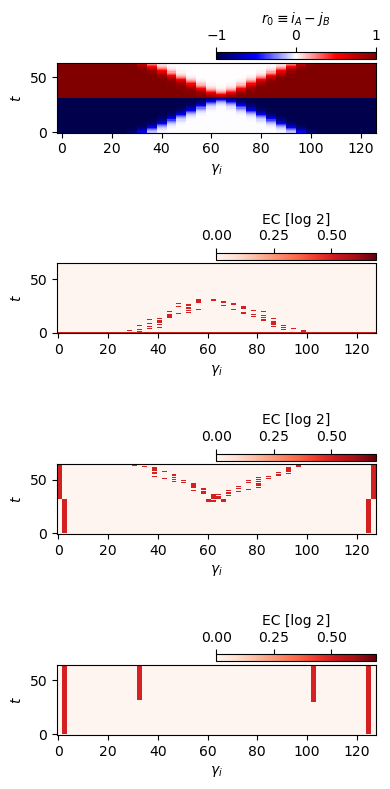

In [727]:
fig,ax=plt.subplots(4,1,figsize=(4,8),tight_layout=True)
im0=ax[0].pcolormesh(np.arange(gtn.L//2)*4,np.arange(gtn.L),r_map,vmin=-1,vmax=1,cmap='seismic')
axins0=ax[0].inset_axes([.5,1.05,0.5,0.1],transform=ax[0].transAxes)
cbar=plt.colorbar(im0,cax=axins0,label='$r_0\equiv i_A-j_B$',orientation='horizontal',)
cbar.ax.xaxis.set_ticks_position('top') 
cbar.ax.xaxis.set_label_position('top')  # Move label to top

im1=ax[1].pcolormesh(np.arange(2*gtn.L),np.arange(gtn.L+1),(EC_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))
axins1=ax[1].inset_axes([.5,1.05,0.5,0.1],transform=ax[1].transAxes,)
cbar=plt.colorbar(im1,cax=axins1,label='EC [log 2]',orientation='horizontal',)
cbar.ax.xaxis.set_ticks_position('top') 
cbar.ax.xaxis.set_label_position('top')  # Move label to top

[ax.set_ylabel('$t$') for ax in ax]
[ax.set_xlabel('$\gamma_i$') for ax in ax]

im2=ax[2].pcolormesh(np.arange(2*gtn.L),np.arange(gtn.L+1),(EC_sys_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))
axins1=ax[1].inset_axes([.5,1.05,0.5,0.1],transform=ax[2].transAxes,)
cbar=plt.colorbar(im2,cax=axins1,label='EC [log 2]',orientation='horizontal',)
cbar.ax.xaxis.set_ticks_position('top') 
cbar.ax.xaxis.set_label_position('top')  # Move label to top

im3=ax[3].pcolormesh(np.arange(2*gtn.L),np.arange(gtn.L+1),(EC_ref_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))
axins1=ax[3].inset_axes([.5,1.05,0.5,0.1],transform=ax[3].transAxes,)
cbar=plt.colorbar(im3,cax=axins1,label='EC [log 2]',orientation='horizontal',)
cbar.ax.xaxis.set_ticks_position('top') 
cbar.ax.xaxis.set_label_position('top')  # Move label to top



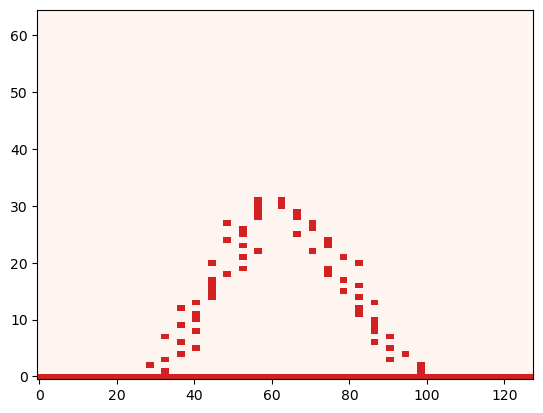

In [698]:
plt.pcolormesh(np.arange(2*gtn.L),np.arange(gtn.L+1),(EC_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))

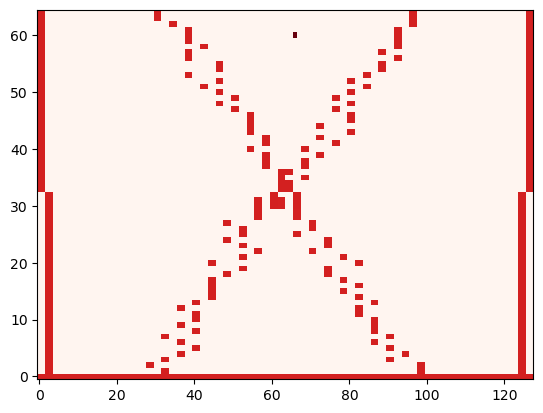

In [693]:
plt.pcolormesh(np.arange(2*gtn.L),np.arange(gtn.L+1),(EC_half_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))
# plt.xlim([60,66])

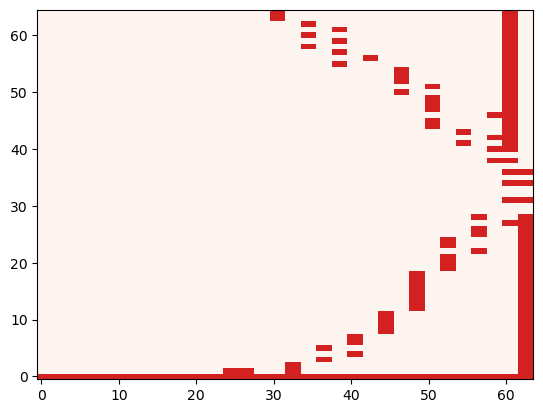

In [683]:
plt.pcolormesh(np.arange(gtn.L),np.arange(gtn.L+1),(EC_left_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))

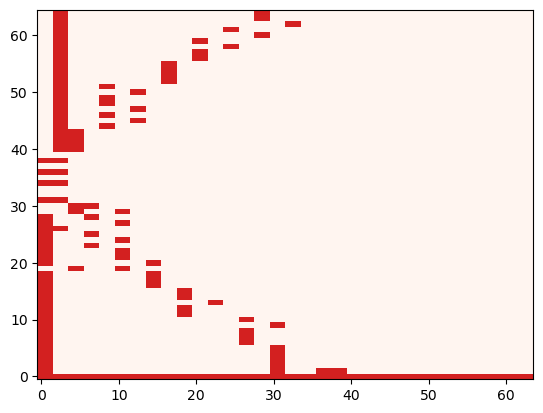

In [670]:
plt.pcolormesh(np.arange(gtn.L),np.arange(gtn.L+1),(EC_right_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))

## DW -  DW collide

In [757]:
def generate_drift_dw2(L,v1=1,v2=1,idx=0,k=1,z=[1,1,-2]):
    # if (gtn.L//2//4+v1*idx)<(gtn.L//2//4*3+v2*idx):
    return interpolation2([(L//4+v1*idx),(L//4*2+v2*idx),(L//4*3)],z,L,k=k,)

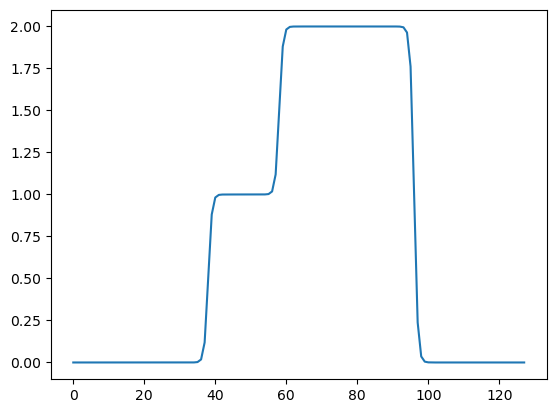

In [760]:
plt.plot(generate_drift_dw2(L=128,v1=1,v2=-1,idx=6,k=1))

In [766]:
def run_dw_dw():
    gtn=GTN(L=128,seed=0,op=True,random_init=False)
    sites_flip=np.sort(gtn.rng.choice(np.arange(2*gtn.L),size=gtn.L,replace=False))
    gtn.set(ij_list=np.array([[site,site+gtn.L*2] for site in sites_flip]),n_list=[-1]*gtn.L)
    t=gtn.L
    EC_list=np.zeros((t+1,2*gtn.L))
    EE_list=np.zeros((t+1,))
    r_map=np.zeros((t,gtn.L//2))
    EC_list[0]=gtn.entanglement_contour(gtn.L+np.arange(gtn.L))
    # EE_list[0]=gtn.von_Neumann_entropy_m(gtn.L+np.arange(gtn.L))
    for i in tqdm(range(t)):
        r_list=generate_drift_dw2(L=gtn.L//2,v1=16/gtn.L,v2=-16/gtn.L,k=1,idx=i)
        
        gtn.measure_all_class_AIII_r(A_list=A,r_list=r_list,Born=True,class_A=True,intraleg=True,)
        gtn.measure_all_class_AIII_r(A_list=np.sqrt(1-A**2),r_list=r_list,Born=True,class_A=True,intraleg=False,)
        r_map[i]=(r_list)
        EC_list[i+1]=gtn.entanglement_contour(np.arange(gtn.L))
        # EE_list[i+1]=gtn.von_Neumann_entropy_m(gtn.L+np.arange(gtn.L))
    return r_map,EC_list

In [767]:
r_map,EC_list, = run_dw_dw()

100%|██████████| 128/128 [01:31<00:00,  1.40it/s]


In [770]:
(EC_list).shape

(129, 256)

(2.0, 6.0)

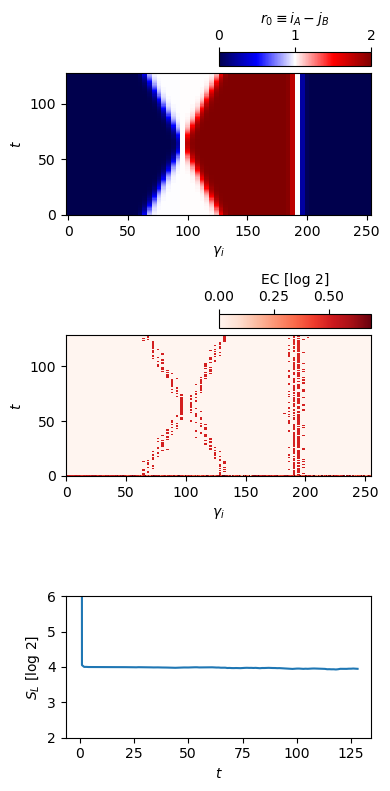

In [774]:
L=128
fig,ax=plt.subplots(3,1,figsize=(4,8),tight_layout=True)
im0=ax[0].pcolormesh(np.arange(L//2)*4,np.arange(L),r_map,vmin=0,vmax=2,cmap='seismic')
axins0=ax[0].inset_axes([.5,1.05,0.5,0.1],transform=ax[0].transAxes)
cbar=plt.colorbar(im0,cax=axins0,label='$r_0\equiv i_A-j_B$',orientation='horizontal',)
cbar.ax.xaxis.set_ticks_position('top') 
cbar.ax.xaxis.set_label_position('top')  # Move label to top

im1=ax[1].pcolormesh(np.arange(2*L),np.arange(L+1),(EC_list)/np.log(2),cmap='Reds',shading='auto',vmin=0,vmax=np.log(2))
axins1=ax[1].inset_axes([.5,1.05,0.5,0.1],transform=ax[1].transAxes,)
cbar=plt.colorbar(im1,cax=axins1,label='EC [log 2]',orientation='horizontal',)
cbar.ax.xaxis.set_ticks_position('top') 
cbar.ax.xaxis.set_label_position('top')  # Move label to top

[ax.set_ylabel('$t$') for ax in ax]
[ax.set_xlabel('$\gamma_i$') for ax in ax]


ax[2].plot(EC_list.sum(axis=-1)/np.log(2))
ax[2].set_ylabel('$S_{L}$ [log 2]')
ax[2].set_xlabel('$t$')
ax[2].set_ylim([2,6])

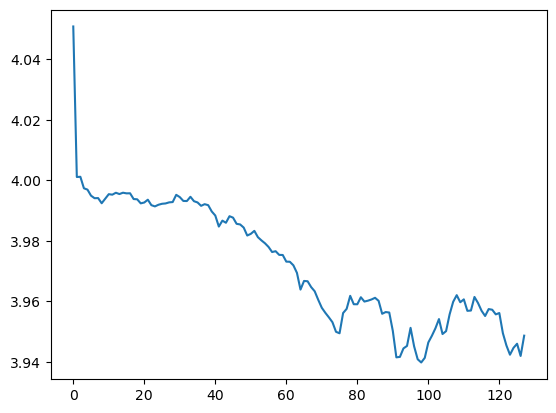

In [609]:
plt.plot(EC_list[1:].sum(axis=-1)/np.log(2))

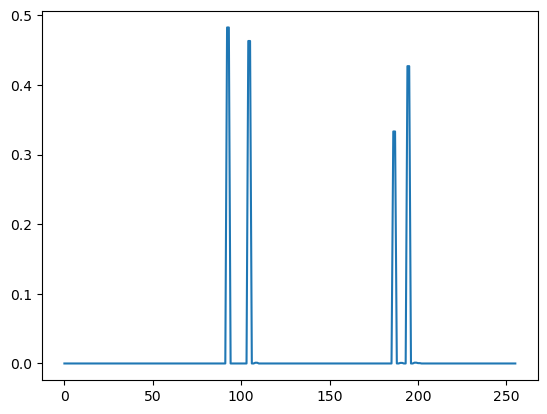

In [477]:
plt.plot((EC_list[-1])/np.log(2))

In [257]:
(gtn.entanglement_contour(np.arange(gtn.L))).sum()

1.278614670351669

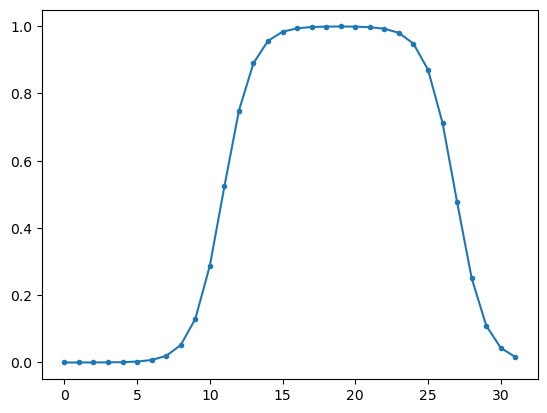

In [208]:
plt.plot(r_map[-1],'.-')

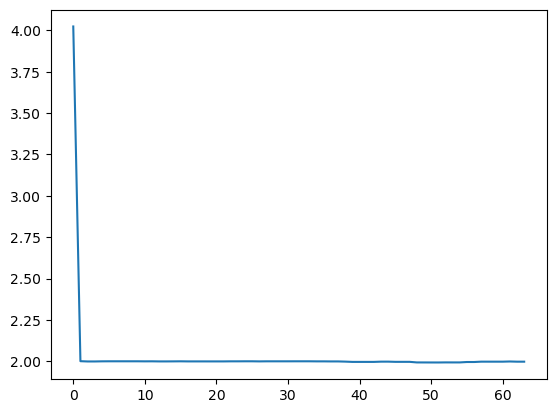

In [198]:
plt.plot(np.array(EC).sum(axis=-1)/np.log(2))

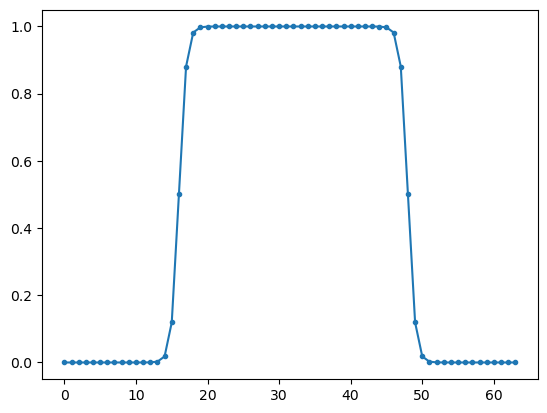

In [625]:
plt.plot(interpolation2([(gtn.L//2//4),(gtn.L//2//4*3)],[1,-1],gtn.L//2,k=1,),'.-')
# (gtn.L//2//4*3)

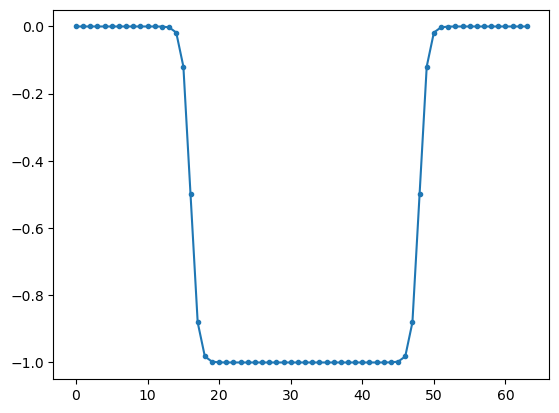

In [626]:
plt.plot(interpolation2([(gtn.L//2//4*3),(gtn.L//2//4),],[1,-1],gtn.L//2,k=1,),'.-')
# (gtn.L//2//4*3)

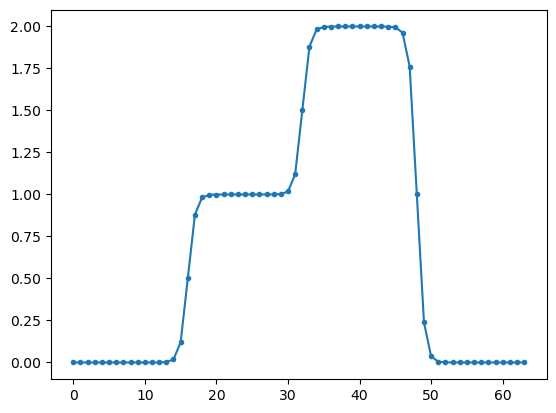

In [454]:
plt.plot(interpolation2([(gtn.L//2//4),(gtn.L//2//4*2),(gtn.L//2//4*3)],[1,1,-2],gtn.L//2,k=1,idx=0),'.-')
# (gtn.L//2//4*3)

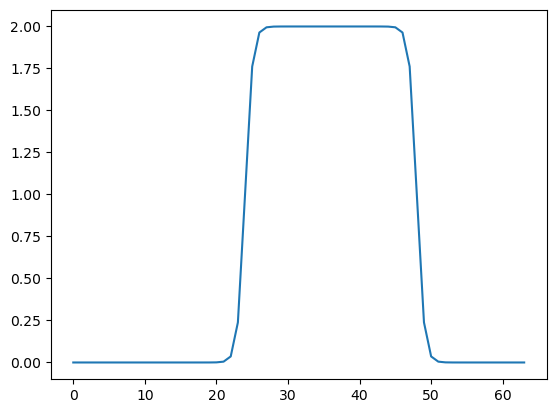

In [457]:
plt.plot(generate_drift_dw2(v1=8/gtn.L,v2=-8/gtn.L,idx=gtn.L))

In [ ]:
plt.plot(generate_drift_dw2(v1=0,v2=0,idx=0))

In [78]:
gtn.von_Neumann_entropy_m(np.arange(0,gtn.L//2))

1.3862920354655066

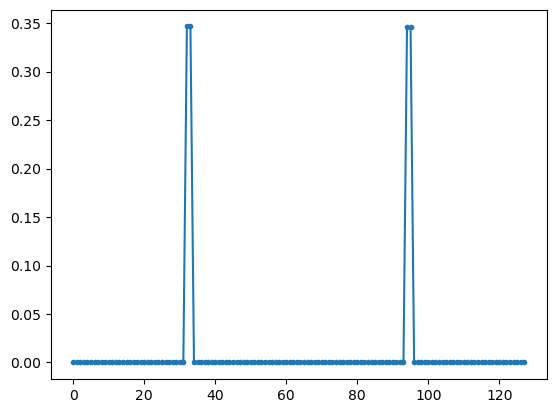

In [80]:
plt.plot(gtn.entanglement_contour(gtn.L+np.arange(gtn.L)),'.-')

# Perfect teleportation

In [13]:
P={'+':[-1,0,0],'-':[1,0,0]}

In [149]:
1/2*np.array([[1,-1j],[1,1j]])@np.array([[0,-1j],[1j,0]])@np.array([[1,1],[1j,-1j]])

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [192]:
gtn=GTN(L=2,seed=1,history=True,random_init=False,pbc=False)
# gtn.measure(n_list=[P['-']],ix=[1,2])
# gtn.measure(n_list=[P['-']],ix=[5,6])
# gtn.measure(n_list=[P['-']],ix=[7,8])
# gtn.measure(n_list=[P['-']],ix=[9,10])
# gtn.measure(n_list=[P['-']],ix=[11,12])
alpha=np.pi/4
phi=2*alpha
gtn.measure(n_list=[[0,np.cos(phi),np.sin(phi)]], ix=[0,1])
# gtn.measure(n_list=[[0,np.cos(phi),np.sin(phi)]], ix=[2,3])
# gtn.measure(n_list=[[0,np.cos(phi),np.sin(phi)]], ix=[3,4])

# gtn.measure(n_list=[P['+']],ix=[3,4])


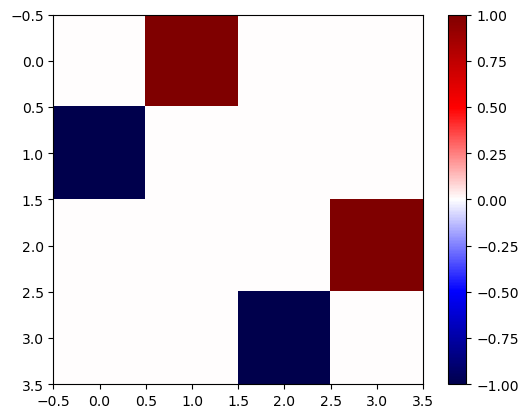

In [193]:
plt.imshow(gtn.C_m_history[0],cmap='seismic',vmin=-1,vmax=1)
plt.colorbar()

In [183]:
fidelity(gtn.C_m_history[0],gtn.C_m_history[-1])

0.7071067811865475

In [65]:
fidelity(gtn.C_m_history[-1],gtn.C_m_history[0])

0.0

In [307]:
from pfapack import pfaffian as pf

In [324]:
subreg=gtn.C_m_history[-1][np.ix_([2,3,4,13],[2,3,4,13])]

In [325]:
subreg

array([[ 0.        , -0.02447174,  0.1545085 , -0.98768834],
       [ 0.02447174,  0.        , -0.98768834, -0.1545085 ],
       [-0.1545085 ,  0.98768834,  0.        , -0.02447174],
       [ 0.98768834,  0.1545085 ,  0.02447174,  0.        ]])

In [326]:
pf.pfaffian(subreg)

1.0000000000000002

In [251]:
np.round(gtn.C_m_history[-1],4)

array([[ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

In [245]:
OO,UU,AA=block_diagonalize(gtn.C_m_history[-1])

In [246]:
np.round(UU,3)

array([[ 0.707+0.j   ,  0.707-0.j   ,  0.   +0.j   ,  0.   -0.j   ,
         0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ,  0.   -0.j   ],
       [ 0.   +0.707j,  0.   -0.707j,  0.   +0.j   ,  0.   -0.j   ,
         0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ,  0.   -0.j   ],
       [-0.   +0.j   , -0.   -0.j   ,  0.707+0.j   ,  0.707-0.j   ,
         0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ,  0.   -0.j   ],
       [-0.   +0.j   , -0.   -0.j   , -0.   -0.707j, -0.   +0.707j,
         0.   +0.j   ,  0.   -0.j   ,  0.   +0.j   ,  0.   -0.j   ],
       [-0.   +0.j   , -0.   -0.j   , -0.   +0.j   , -0.   -0.j   ,
         0.707+0.j   ,  0.707-0.j   ,  0.   +0.j   ,  0.   -0.j   ],
       [-0.   +0.j   , -0.   -0.j   , -0.   +0.j   , -0.   -0.j   ,
         0.   +0.707j,  0.   -0.707j,  0.   +0.j   ,  0.   -0.j   ],
       [-0.   +0.j   , -0.   -0.j   , -0.   +0.j   , -0.   -0.j   ,
        -0.   +0.j   , -0.   -0.j   ,  0.707+0.j   ,  0.707-0.j   ],
       [-0.   +0.j   , -0.   -0.j   , -0.

In [247]:
np.round(UU.T.conj(),3)

array([[ 0.707-0.j   ,  0.   -0.707j, -0.   -0.j   , -0.   -0.j   ,
        -0.   -0.j   , -0.   -0.j   , -0.   -0.j   , -0.   -0.j   ],
       [ 0.707+0.j   ,  0.   +0.707j, -0.   +0.j   , -0.   +0.j   ,
        -0.   +0.j   , -0.   +0.j   , -0.   +0.j   , -0.   +0.j   ],
       [ 0.   -0.j   ,  0.   -0.j   ,  0.707-0.j   , -0.   +0.707j,
        -0.   -0.j   , -0.   -0.j   , -0.   -0.j   , -0.   -0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   ,  0.707+0.j   , -0.   -0.707j,
        -0.   +0.j   , -0.   +0.j   , -0.   +0.j   , -0.   +0.j   ],
       [ 0.   -0.j   ,  0.   -0.j   ,  0.   -0.j   ,  0.   -0.j   ,
         0.707-0.j   ,  0.   -0.707j, -0.   -0.j   , -0.   -0.j   ],
       [ 0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,
         0.707+0.j   ,  0.   +0.707j, -0.   +0.j   , -0.   +0.j   ],
       [ 0.   -0.j   ,  0.   -0.j   ,  0.   -0.j   ,  0.   -0.j   ,
         0.   -0.j   ,  0.   -0.j   ,  0.707-0.j   , -0.   +0.707j],
       [ 0.   +0.j   ,  0.   +0.j   ,  0.

In [248]:
np.round(OO,4)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [249]:
np.round(AA,10)

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [238]:
np.round(OO.T,4)

array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [239]:
np.linalg.det(OO)

-0.9999999999999991

In [59]:
(OO.T)[:,1]@gtn.C_m_history[-1][0]

0.9999999999999998

In [264]:
def gamma03(Gamma,alpha,p):
    return np.cos(alpha)/2*(Gamma[0,3]+p*(Gamma[0,1]*Gamma[2,3]-Gamma[0,2]*Gamma[1,3]+Gamma[0,3]*Gamma[1,2]))


In [265]:
gamma03(gtn.C_m_history[1], 0, -1)*2

0.5831068509148698

In [250]:
gtn.C_m_history[1]

array([[ 0., -1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0., -1.,  0.]])

In [125]:
gtn.measure(n_list=[P['+']],ix=[1,2])

In [126]:
gtn.C_m_history[-1]

array([[ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
fig,ax=plt.subplots()
ax.plot(iteration,MI.mean(axis=0),'.-')
# ax.plot(iteration,EE[:,:,-1].mean(axis=0))
# ax.plot(iteration,EE_1[:,:,-1].mean(axis=0))
ax.grid('on')
ax.set_xlabel('t')
ax.set_ylabel('MI ')

ax2=ax.twinx()
ax2.plot(np.array(error[1:]).reshape((iteration.shape[0],-1)).mean(axis=1),'.-',color='r')
# ax2.set_yscale('log')

In [710]:
C_m=gtn.C_m_history[-1]

In [718]:
val,vec=nla.eigh(1j*C_m)

In [723]:
vec_n=vec[:,:C_m.shape[0]//2]

In [725]:
vec_1=np.c_[vec_n,vec_n.conj()]

In [730]:
np.abs(np.imag(vec_1.T.conj()@(1j*C_m)@vec_1)).max()

4.801523335887415e-16

In [750]:
D=np.diag(np.array([-1]*(val.shape[0]//2)+[1]*(val.shape[0]//2)))

In [757]:
C_m_1=(vec@(D)@vec.T.conj()).imag

In [765]:
nla.norm(C_m@C_m+np.eye(C_m.shape[0]))

4.8705571680022986e-12

In [766]:
nla.norm(C_m_1@C_m_1+np.eye(C_m_1.shape[0]))

1.7839684119352026e-14

In [754]:
nla.norm((vec@(D)@vec.T.conj()).imag)

11.313708498984761

In [777]:
def purify(Gamma):
    C_f=1j*Gamma
    val,vec=nla.eigh(C_f)
    D=np.diag(np.array([-1]*(Gamma.shape[0]//2)+[1]*(Gamma.shape[0]//2)))
    return (vec@D@vec.T.conj()).imag

In [783]:
C_m_1=[purify(Gamma) for Gamma in gtn.C_m_history]

In [739]:
np.round(val,0)

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [676]:
np.array(error[1:]).reshape((-1,60))[0].mean()

8.067620645609471e-16

In [685]:
np.array(error[1:]).reshape((60,-1)).mean(axis=1)

array([9.05525654e-16, 8.00748357e-15, 1.20858185e-14, 2.22087973e-13,
       6.41943096e-13, 5.33781352e-13, 1.28338312e-13, 1.84787949e-13,
       8.59737628e-14, 1.12364978e-13, 2.49271090e-13, 1.48847254e-12,
       9.54876803e-13, 2.63482812e-13, 8.45382792e-14, 1.61259894e-13,
       8.27144776e-13, 3.14683175e-13, 2.88541760e-13, 2.54438831e-13,
       2.29725960e-13, 1.53018223e-13, 1.52456173e-13, 6.43686493e-14,
       1.58191168e-13, 7.20673521e-14, 5.42534767e-14, 1.11393533e-13,
       1.89801300e-13, 3.52195703e-13, 2.32166716e-13, 3.63233749e-14,
       5.48788445e-14, 1.24549676e-13, 1.12247017e-13, 2.00259948e-13,
       1.89017205e-13, 7.12285265e-13, 8.76793430e-13, 3.58192642e-13,
       6.68649164e-14, 1.00922742e-13, 1.82106066e-13, 2.24294541e-13,
       1.93463301e-13, 1.00551512e-13, 4.18831636e-14, 8.91387658e-14,
       6.70366540e-14, 4.15834034e-13, 2.21616475e-12, 7.26287433e-12,
       6.98269741e-12, 6.31800341e-12, 2.15213784e-12, 5.46108471e-12,
      

In [670]:
np.array(error[1:61])

array([0.0000000e+00, 4.4408921e-16, 4.4408921e-16, 4.4408921e-16,
       4.4408921e-16, 4.4408921e-16, 4.4408921e-16, 4.4408921e-16,
       4.4408921e-16, 4.4408921e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e-16,
       8.8817842e-16, 8.8817842e-16, 8.8817842e-16, 8.8817842e

In [674]:
np.array(error[61:121])

array([8.88178420e-16, 8.88178420e-16, 8.88178420e-16, 8.88178420e-16,
       8.88178420e-16, 8.88178420e-16, 8.88178420e-16, 8.88178420e-16,
       8.88178420e-16, 8.88178420e-16, 8.88178420e-16, 8.88178420e-16,
       8.88178420e-16, 8.88178420e-16, 8.88178420e-16, 8.88178420e-16,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 1.11022302e-15,
       1.11022302e-15, 1.22124533e-15, 1.22124533e-15, 1.11022302e-15,
       1.11022302e-15, 1.11022302e-15, 1.11022302e-15, 1.11022302e-15,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 9.99200722e-16,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 1.11022302e-15,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 9.99200722e-16,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 9.99200722e-16,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 9.99200722e-16,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 9.99200722e-16,
       9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 9.99200722e-16,
      

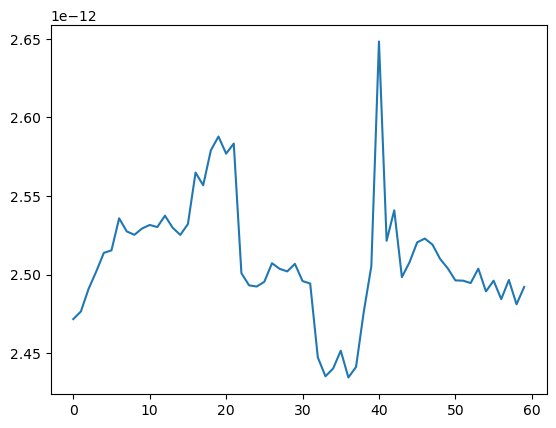

In [662]:
plt.plot(np.array(error[1:]).reshape((-1,60)).mean(axis=0))
# plt.yscale('log')

In [634]:
len(gtn.C_m_history)

3841

In [625]:
np.diag(gtn.C_m_history[-2],k=1)[::2]

array([-0.56229156,  0.50131202, -0.83607698,  0.75358539,  0.42924943,
       -0.31063371,  0.52237775, -0.76579481, -0.70125808,  0.80792034,
        0.91830092,  0.80806345, -0.83593999, -0.50300171, -0.50519311,
        0.93165433,  0.91402502, -0.91713155,  0.40487579,  0.69326397,
       -0.44444661, -0.24931832,  0.65363264, -0.06316381,  0.56911086,
       -0.72971391,  0.94060651,  0.95534366,  0.91007666,  0.84026311,
        0.57546477, -0.1217449 ,  0.12062024,  0.70394342,  0.87284794,
       -0.73976984,  0.60305859,  0.70212572, -0.85955176,  0.60869505,
        0.59927606, -0.81740845,  0.88464099, -0.92666123,  0.88726133,
        0.72899747,  0.47448938, -0.57227205,  0.85724971,  0.81617319,
       -0.84965712, -0.75851393,  0.77078106, -0.71225665, -0.74994287,
        0.35226528, -0.34300025,  0.3277341 ,  0.83823041,  0.80097562,
       -0.03135244,  0.70530906, -0.00926409,  0.90901843])

In [633]:
len(gtn.n_history)/64

60.0

Text(0, 0.5, 'MI ')

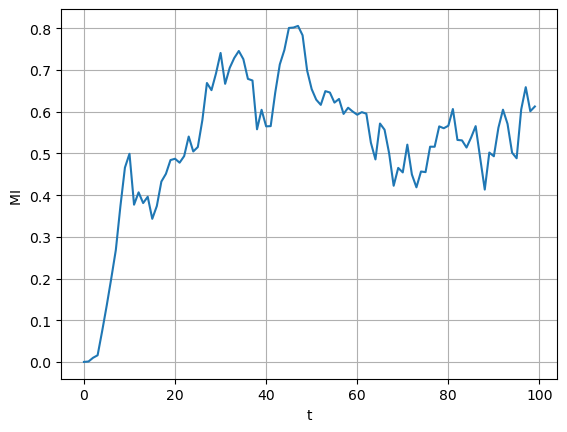

In [345]:
plt.plot(iteration,MI.mean(axis=0))
plt.grid('on')
plt.xlabel('t')
plt.ylabel('MI ')

In [50]:
z=[([gtn.von_Neumann_entropy_m(np.arange(i,(i+dl))%gtn.L)/np.log(2) for i in range(gtn.L)]) for dl in range(1,gtn.L//2)]

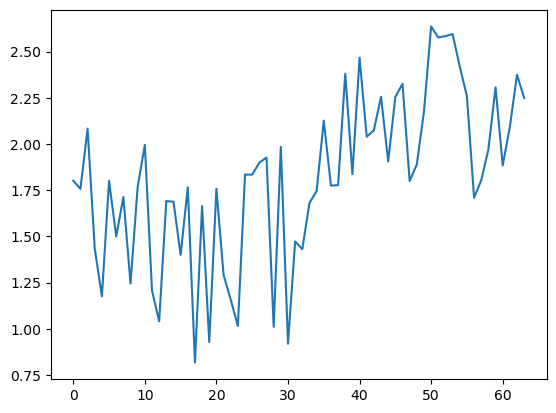

In [51]:
plt.plot(z[10])

In [139]:
gtn.mutual_information_cross_ratio()/np.log(2)

0.3803550405436396

In [141]:
zz=gtn.C_m_history[-1]

In [142]:
np.round(gtn.C_m_history[-1],2)

array([[ 0.  ,  0.54,  0.65, ..., -0.03, -0.24,  0.11],
       [-0.54,  0.  ,  0.41, ...,  0.01,  0.04,  0.22],
       [-0.65, -0.41,  0.  , ...,  0.01,  0.04,  0.25],
       ...,
       [ 0.03, -0.01, -0.01, ...,  0.  ,  0.73,  0.11],
       [ 0.24, -0.04, -0.04, ..., -0.73,  0.  ,  0.62],
       [-0.11, -0.22, -0.25, ..., -0.11, -0.62,  0.  ]])

In [524]:
n2,n3=get_inplane(0, num=10000)

(array([2104.,  872.,  762.,  650.,  625.,  621.,  690.,  750.,  910.,
        2016.]),
 array([-9.99999985e-01, -8.00000051e-01, -6.00000117e-01, -4.00000182e-01,
        -2.00000248e-01, -3.13884356e-07,  1.99999620e-01,  3.99999555e-01,
         5.99999489e-01,  7.99999423e-01,  9.99999357e-01]),
 <BarContainer object of 10 artists>)

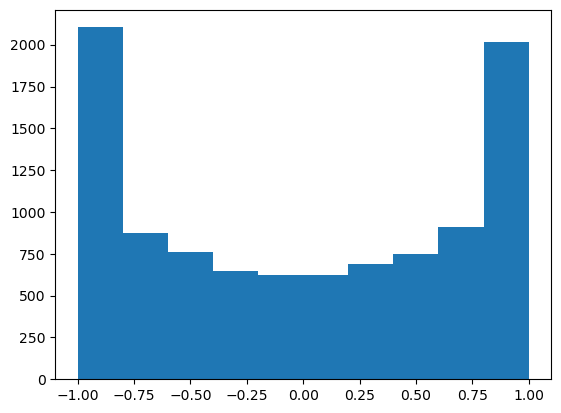

In [525]:
plt.hist(n2)

(array([2064.,  928.,  743.,  703.,  634.,  612.,  667.,  745.,  901.,
        2003.]),
 array([-9.99999863e-01, -7.99999891e-01, -5.99999919e-01, -3.99999947e-01,
        -1.99999975e-01, -2.78171575e-09,  1.99999969e-01,  3.99999941e-01,
         5.99999914e-01,  7.99999886e-01,  9.99999858e-01]),
 <BarContainer object of 10 artists>)

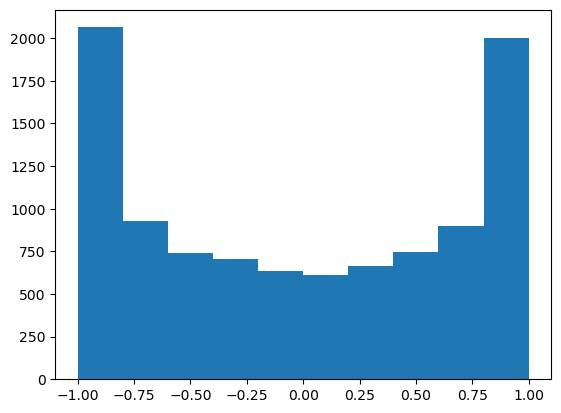

In [519]:
plt.hist(np.sin(np.random.random(size=10000)*np.pi*2))

In [69]:
from scipy import stats

In [70]:
def extract_slope(gtn):
    Cr=[np.mean(np.r_[np.diag(gtn.C_m_history[-1],k=r),np.diag(gtn.C_m_history[-1],k=-(gtn.C_m_history[-1].shape[0]-r))]**2) for r in range(1,gtn.L//2)]
    res=stats.linregress(range(1,gtn.L//2),np.log(Cr))
    return -res.slope
    

In [99]:
# L=128
L_list=[128,]
# iteration=np.arange(128)
ensemble_size=10
sigma_list=np.arange(.1,1.1,.1)
SL2=np.zeros((len(L_list),len(sigma_list),ensemble_size,))
xi_inv=np.zeros((len(L_list),len(sigma_list),ensemble_size,))
for sigma_i,sigma in enumerate(sigma_list):
    print(sigma)
    for L_i,L in enumerate(L_list):
        print(L)
        for ensemble in range(ensemble_size):
            gtn=GTN(L=L,history=True,seed=ensemble,c=[-1,-1,-1])
            for i in range(L):
                gtn.measure_all_Haar(sigma=sigma,even=True,theta_list=0,phi_list=0)
                gtn.measure_all_Haar(sigma=sigma,even=False,theta_list=np.pi/2,phi_list=np.pi/2)
            SL2[L_i,sigma_i,ensemble]=np.mean([gtn.von_Neumann_entropy_m(np.arange(i,(i+gtn.L//2))%gtn.L) for i in range(gtn.L)])
            xi_inv[L_i,sigma_i,ensemble]=extract_slope(gtn)
            

0.1
128
0.2
128
0.30000000000000004
128
0.4
128
0.5
128
0.6
128
0.7000000000000001
128
0.8
128
0.9
128
1.0
128


(0.0, 1.5)

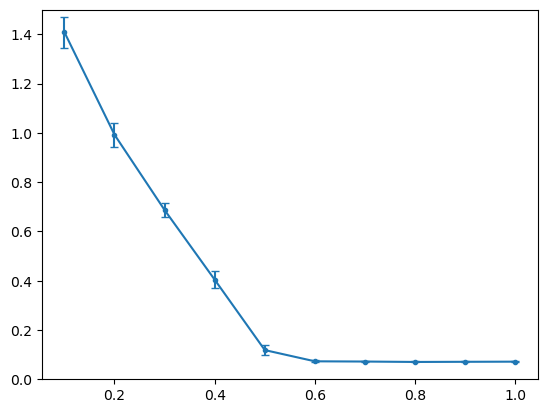

In [100]:
fig,ax=plt.subplots()
ax.errorbar(sigma_list,xi_inv.mean(axis=(2,0)),xi_inv.std(axis=(2,0)),capsize=3,fmt='.-')
ax.set_ylim([0,1.5])

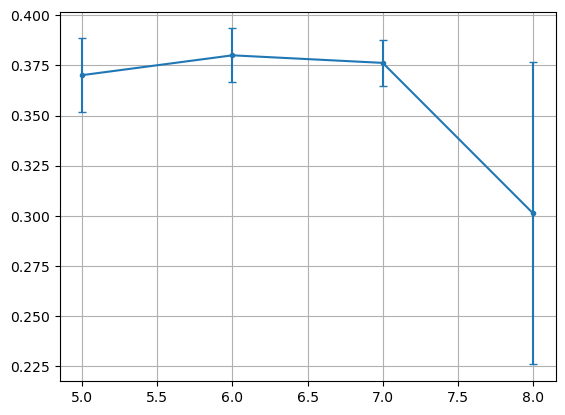

In [604]:
fig,ax=plt.subplots()
ax.errorbar(np.log2(L_list),SL2.mean(axis=1),SL2.std(axis=1)/np.sqrt(SL2.shape[0]),capsize=3,fmt='.-')
ax.grid('on')

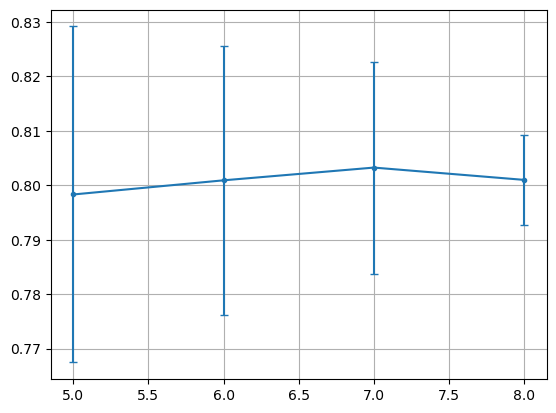

In [ ]:
fig,ax=plt.subplots()
ax.errorbar(np.log2(L_list),SL2.mean(axis=1),SL2.std(axis=1)/np.sqrt(SL2.shape[0]),capsize=3,fmt='.-')
ax.grid('on')

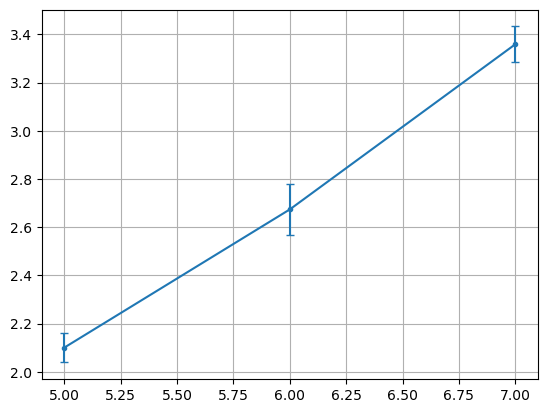

In [ ]:
fig,ax=plt.subplots()
ax.errorbar(np.log2(L_list),SL2.mean(axis=1),SL2.std(axis=1)/np.sqrt(SL2.shape[0]),capsize=3,fmt='.-')
ax.grid('on')

In [590]:
gtn.von_Neumann_entropy_m(np.arange(gtn.L//2))

2.1587535655786243

In [593]:
np.mean([gtn.von_Neumann_entropy_m(np.arange(i,(i+gtn.L//2))%gtn.L) for i in range(gtn.L)])

0.7946802264146469

In [565]:
# zz=get_random(a1=.5,a2=.5,b1=.5,b2=.5,num=10000)
zz=get_Haar(.25, 10000)

(array([269., 420., 470., 514., 512., 591., 580., 576., 603., 583., 545.,
        546., 557., 578., 504., 555., 494., 478., 383., 242.]),
 array([-0.86568839, -0.77920701, -0.69272563, -0.60624426, -0.51976288,
        -0.4332815 , -0.34680012, -0.26031874, -0.17383737, -0.08735599,
        -0.00087461,  0.08560677,  0.17208815,  0.25856952,  0.3450509 ,
         0.43153228,  0.51801366,  0.60449503,  0.69097641,  0.77745779,
         0.86393917]),
 <BarContainer object of 20 artists>)

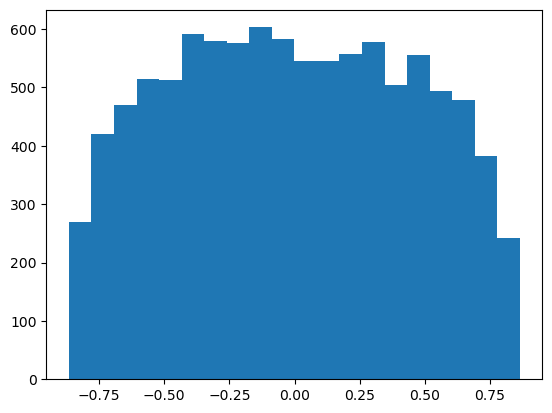

In [568]:
plt.hist(zz[:,2],bins=20)
# plt.hist(n3,bins=20)

In [508]:
np.sqrt(1-0.9**2)

0.4358898943540673

In [22]:
x=np.random.uniform(size=1000)

In [23]:
y=np.sqrt(x)

(array([ 29.,  38.,  45.,  77.,  92., 109., 131., 145., 171., 163.]),
 array([0.04806721, 0.14314844, 0.23822967, 0.3333109 , 0.42839213,
        0.52347336, 0.61855459, 0.71363582, 0.80871705, 0.90379828,
        0.99887951]),
 <BarContainer object of 10 artists>)

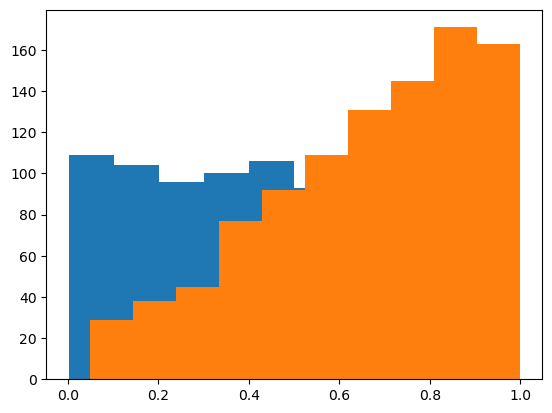

In [28]:
plt.hist(x)
plt.hist(y)

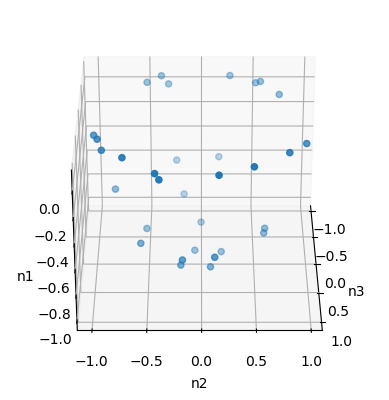

In [107]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
zz=np.array(gtn.n_history[:32])
ax.scatter(zz[:,2],zz[:,1],zz[:,0])
ax.set_xlabel('n3')
ax.set_ylabel('n2')
ax.set_zlabel('n1')
ax.view_init(azim=0)

In [309]:
gtn=GTN(L=128)
for r in range(10):
    for i in range(0,gtn.L,2):
        gtn.measure([1,0,0], [i,(i+1)%(2*gtn.L)])
    for i in range(1,gtn.L,2):
        gtn.measure([0,0,1], [i,(i+1)%(2*gtn.L)])
# gtn.measure_all_forced(b2=1,a2= 1, a1= 1,b1= 1,even=True,n1_z=True)
# mat1,mat2,mat3=gtn.measure(np.array([0,1,0]), [0,1])
# mat1,mat2,mat3=gtn.measure(np.array([-.99999,np.sqrt(1-.99999**2),0]), [0,1])

In [310]:
gtn.mutual_information_cross_ratio()

0.0

In [ ]:
gtn.n_history

In [271]:
mat1

array([[ 0.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [272]:
mat2

array([[ 0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [273]:
mat3

array([[ 0.,  1.,  1.,  0.],
       [-1.,  0.,  0.,  1.],
       [-1., -0.,  0.,  0.],
       [-0., -1.,  0.,  0.]])

In [274]:
pd.DataFrame(np.linalg.inv(mat3))

,0,1,2,3
0,-0.0,-0.0,-1.0,-0.0
1,0.0,0.0,0.0,-1.0
2,1.0,0.0,0.0,1.0
3,-0.0,1.0,-1.0,-0.0


In [275]:
gtn.n_history

[array([0, 1, 0])]

In [276]:
gtn.C_m_history

[array([[ 0.,  1.,  0.,  0.],
        [-1.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [-0.,  0., -1.,  0.]]),
 array([[ 0.,  1.,  0.,  0.],
        [-1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.]])]

In [296]:
L_list=2**np.arange(4,8)
iteration=np.arange(200)
MI=np.zeros((L_list.shape[0],iteration.shape[0]))
for L_i,L in enumerate(L_list):
    gtn=GTN(L=L)
    for i in iteration:
        gtn.measure_all_forced(b2=0.1,a2= 0, a1=.5,b1= 1,even=True,n1_z=True)
        gtn.measure_all_forced(b2=0.1,a2= 0, a1=.5,b1= 1,even=False,n1_z=False)
        MI[L_i,i]=gtn.mutual_information_cross_ratio()

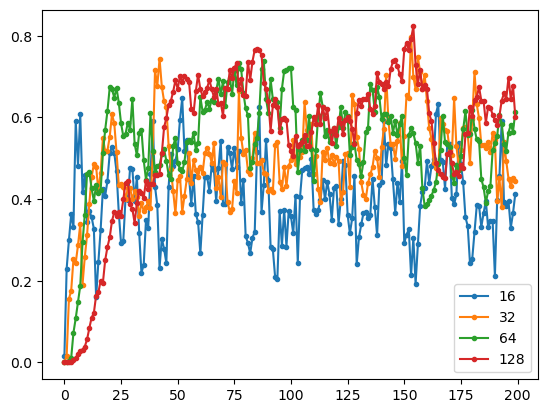

In [298]:
fig,ax=plt.subplots()
# ax.plot(L_list,np.mean(MI[:,-10:],axis=1),'.-')
for i in range(L_list.shape[0]):
    ax.plot(MI[i],'.-',label=str(L_list[i]))
ax.legend()
# ax.set_xscale('log')

In [299]:
L_list=2**np.arange(4,8)
iteration=np.arange(200)
MI_critical=np.zeros((L_list.shape[0],iteration.shape[0]))
for L_i,L in enumerate(L_list):
    gtn=GTN(L=L)
    for i in iteration:
        gtn.measure_all_forced(b2=1,a2= 0, a1=.5,b1= 1,even=True,n1_z=True)
        gtn.measure_all_forced(b2=1,a2= 0, a1=.5,b1= 1,even=False,n1_z=False)
        MI_critical[L_i,i]=gtn.mutual_information_cross_ratio()

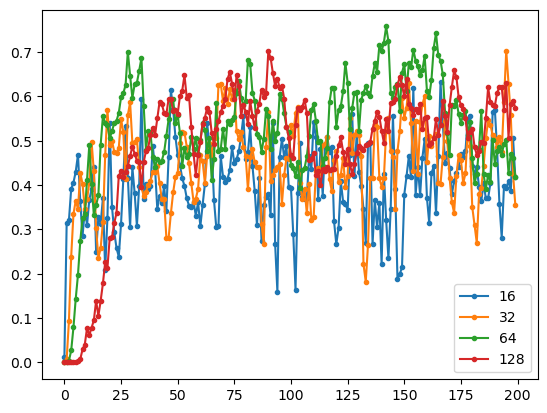

In [300]:
fig,ax=plt.subplots()
# ax.plot(L_list,np.mean(MI_critical[:,-10:],axis=1),'.-')
for i in range(L_list.shape[0]):
    ax.plot(MI_critical[i],'.-',label=str(L_list[i]))
ax.legend()
# ax.set_xscale('log')

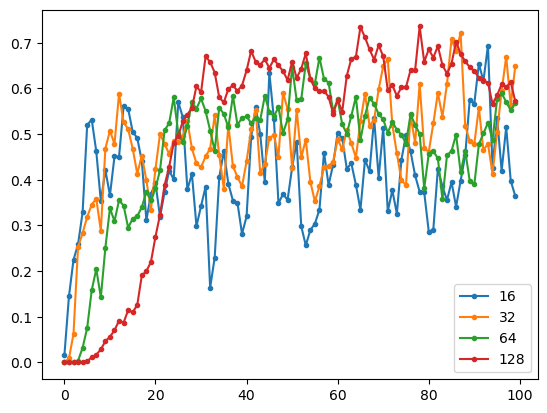

In [192]:
fig,ax=plt.subplots()
# ax.plot(L_list,np.mean(MI_critical[:,-10:],axis=1),'.-')
for i in range(L_list.shape[0]):
    ax.plot(MI_critical[i],'.-',label=str(L_list[i]))
ax.legend()
# ax.set_xscale('log')

In [255]:
gtn.measure(np.array([1,0,0]), [0,1])

In [257]:
gtn.measure(np.array([1,1,0]), [0,1])

In [285]:
# gtn.measure_all_forced(b2=-.9,a2= -.7, a1=.7,b1= .9)
gtn.measure_all_forced(b2=-.9,a2= -.7, a1=.7,b1= .9,even=False)

In [283]:
gtn.n_history

[array([ 0.70708212, -0.6158029 ,  0.34759411]),
 array([ 0.71292935, -0.07927067,  0.69674092]),
 array([-0.73656885,  0.6753321 ,  0.03732137]),
 array([-0.87550474, -0.06941651, -0.47819745])]

In [209]:
np.round(gtn.kraus(gtn.n_history[0]))

array([[-0.,  1., -0., -0.],
       [-1., -0.,  0., -0.],
       [ 0., -0., -0., -1.],
       [ 0.,  0.,  1., -0.]])

In [288]:
gtn.mutual_information_m([0,1],[2,3])/np.log(2)

2.718401573307823

In [ ]:
gtn.C_m_history

In [287]:
np.round(gtn.C_m_history[-1]@gtn.C_m_history[-1]+np.eye(gtn.C_m_history[-1].shape[0]),4)

array([[ 0., -0., -0., -0.,  0., -0.,  0., -0.],
       [-0.,  0.,  0.,  0., -0.,  0., -0., -0.],
       [-0.,  0.,  0.,  0., -0.,  0., -0.,  0.],
       [-0.,  0.,  0.,  0., -0., -0., -0., -0.],
       [ 0., -0., -0., -0.,  0., -0.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0., -0.,  0.],
       [ 0., -0., -0., -0.,  0., -0.,  0.,  0.],
       [-0., -0.,  0., -0., -0.,  0.,  0.,  0.]])

In [154]:
zz=gtn.get_random(b2=-.8,a2= -.2, a1=.6,b1= .8,n= 100)

In [ ]:
zz

In [156]:
np.linalg.norm(zz,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

(array([646., 675., 635., 655., 646., 684., 672., 722., 665., 636., 689.,
        162.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 511., 678., 641., 683.]),
 array([-7.99993005e-01, -7.46663848e-01, -6.93334691e-01, -6.40005535e-01,
        -5.86676378e-01, -5.33347221e-01, -4.80018065e-01, -4.26688908e-01,
        -3.73359751e-01, -3.20030595e-01, -2.66701438e-01, -2.13372281e-01,
        -1.60043125e-01, -1.06713968e-01, -5.33848111e-02, -5.56544542e-05,
         5.32735022e-02,  1.06602659e-01,  1.59931816e-01,  2.13260972e-01,
         2.66590129e-01,  3.19919286e-01,  3.73248442e-01,  4.26577599e-01,
         4.79906756e-01,  5.33235912e-01,  5.86565069e-01,  6.39894226e-01,
         6.93223383e-01,  7.46552539e-01,  7.99881696e-01]),
 <BarContainer object of 30 artists>)

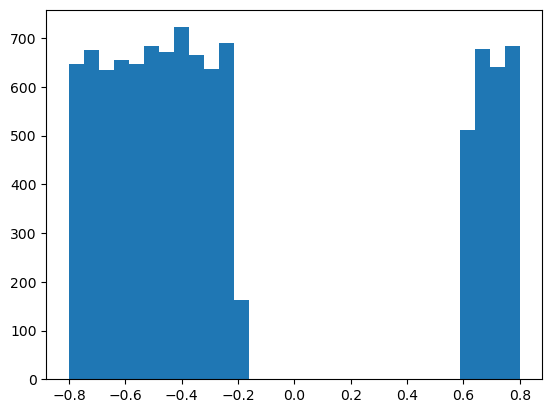

In [124]:
plt.hist(zz,30)

In [97]:
gtn.kraus(np.array([1,0,0]),theta=0)

array([[ 0.,  1.,  0.,  0.],
       [-1.,  0., -0.,  0.],
       [-0.,  0.,  0., -1.],
       [-0., -0.,  1.,  0.]])

In [77]:
gtn.C_m

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [-0.,  0., -1.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-0.,  0., -0.,  0., -1.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-0.,  0., -0.,  0., -0.,  0., -1.,  0.]])

In [67]:
gtn.C_m=np.array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [72]:
gtn.C_m_history=[np.array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])]

In [56]:
gtn.measure(0, [0,1])

In [57]:
gtn.i_history

[[0, 1], [0, 1]]

In [73]:
gtn.C_m_history

[array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])]

In [25]:
gtn.measure(0, [0,1])

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -0.,  0., -1.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0., -0.,  0., -0.,  0., -1.,  0.]])

In [19]:
gtn.measure(1, [1,2])

array([[ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [60]:
gtn.von_Neumann_entropy_m([0,1])

In [75]:
gtn.mutual_information_m([0,1],[2,3])/np.log(2)

2.0

# Draft

In [ ]:
L=64
gtn=GTN(L=L,seed=0+1,history=True,op=False,trijunction=True,random_init=False)

In [ ]:
site_lists=[]
p_lists=[]
_=initialization(gtn.L,p=1,time=4,site_lists=site_lists,p_lists=p_lists)

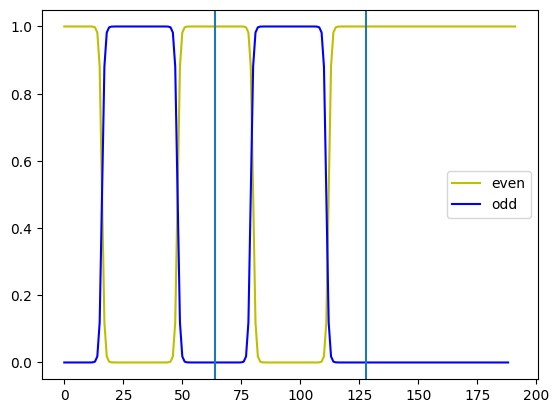

In [ ]:
plt.plot(p_lists[0],label='even',color='y')
plt.plot(p_lists[1],label='odd',color='b')
plt.axvline(x=64)
plt.axvline(x=128)
plt.legend()

In [ ]:
# len(braiding.site_lists)
len(braiding.p_lists)

35

In [ ]:
np.array(braiding.site_lists[2*15])

array([[127, 255]])

In [ ]:
def initialization(L,p,time=5,site_lists=None,p_lists=None):
    if site_lists is None or p_lists is None:
        site_lists=[]
        p_lists=[]
    else:
        assert isinstance(site_lists, list) and isinstance(p_lists, list), f'site_lists type:{type(site_lists)} and p_lists type:{type(p_lists)}should be list'

    i_list=np.arange(0,2*L,2)
    # j_list=i_list+1
    site_0_list=[[leg*2*L+i,leg*2*L+i+1] for leg in range(3) for i in i_list ]
    site_1_list=[[leg*2*L+i+1,leg*2*L+i+2] for leg in range(3) for i in i_list[:-1]] 
    start_pos=L*1//4
    end_pos=L*3//4
    p_lhl=list(interpolation(x1=start_pos,x2=end_pos,l0=p,h0=1-p,L=L))
    p_hlh=list(interpolation(x1=start_pos,x2=end_pos,l0=1-p,h0=p,L=L-1))
    p_l=list(interpolation(x1=start_pos,x2=end_pos,l0=p,h0=p,L=L))
    p_h=list(interpolation(x1=start_pos,x2=end_pos,l0=1-p,h0=1-p,L=L-1))
    p_0_list=p_lhl+p_lhl+p_l
    p_1_list=p_hlh+p_hlh+p_h
    for t in range(time):
        site_lists.append(site_0_list)
        p_lists.append(p_0_list)
        site_lists.append(site_1_list)
        p_lists.append(p_1_list)
    
    return site_lists,p_lists

 

In [ ]:
np.arange

In [ ]:
z=np.linspace([0,10],[1,12],11)

In [ ]:
def shift_DW(L,p,leg,start,end,time=10,site_lists=None,p_lists=None):
    '''
    time: total time step of shifting of domain wall from `start` to `end`
    start: [start_0, start_1] starting profile of prob at even sites, and odd sites
    end: [end_0, end_1] end profile of prob at even sites, and odd sites

    The evolution trajectory is the interpolation between the start and end.
    '''
    if site_lists is None or p_lists is None:
        site_lists=[]
        p_lists=[]
    else:
        assert isinstance(site_lists, list) and isinstance(p_lists, list), f'site_lists type:{type(site_lists)} and p_lists type:{type(p_lists)}should be list'
    assert leg ==0 and leg ==1 and leg ==2, f'chain number {leg} should be 0,1,2 '
    site_0_list=[[leg*2*L+i,leg*2*L+i+1] for i in i_list ]
    site_1_list=[[leg*2*L+i+1,leg*2*L+i+2] for i in i_list[:-1]]

    start_0,start_1=start
    end_0, end_1=end
    evo_0=np.linspace(start_0,end_0,time)
    evo_1=np.linspace(start_1,end_1,time)
    for evo_e,evo_o in zip(evo_0.tolist(),evo_1.tolist()):
        site_lists.append(even_site)
        p_lists.append(evo_e)
        site_lists.append(odd_site)
        p_lists.append(evo_o)

    return site_lists,p_lists
        


